<div style="background-color:#f2f2f2; padding: 20px; border-radius: 10px; border-left: 8px solid #4B8BBE;">

<h1 style="color:#4B8BBE;">📚 Projet Data : Analyse Lapage</h1>

<p><strong>Auteur :</strong> Antoine Baude  
<strong>Date :</strong> Avril 2025  
<strong>Description :</strong> Ce notebook explore les données d’un site de librairie pour révéler des tendances de lecture, les meilleures ventes, et les comportements d'achat.  
<strong>Technos utilisées :</strong> Python 🐍 | Pandas | Matplotlib | Seaborn | Jupyter Notebook  
</p>

---

<h3>🧭 Plan du projet :</h3>
<ol>
  <li>Importation des librairies</li>
  <li>Chargement des données</li>
  <li>Analyse exploratoire</li>
  <li>Visualisations</li>
  <li>Conclusions</li>
</ol>

</div>

* **[Mise en place du jeu de données](#chapter1)**
    * [Importation des librairies et des fichiers nécessaires au projet](#section_1_1)
    * [Présentation et vérification des fichiers](#section_1_2)
    * [Nettoyage des données](#section_1_3)
* **[Analyses des indicateurs de ventes](#chapter2)**
    * [Etude du chiffre d'affaires](#section_2_1)
        * [Evolution du CA & Moyenne mobile](#section_2_1_1)
        * [CA par catégorie de produits](#section_2_1_2)
    * [Etude des produits](#section_2_2)
        * [Produits les plus & les moins vendus](#section_2_2_1)
        * [Prix des produits selon leurs catégories](#section_2_2_2)
    * [Etude du profil des clients](#section_2_3)
        * [Profil des clients selon leurs âges](#section_2_3_1)
        * [Répartition du chiffre d'affaire entre les clients](#section_2_3_2)
        * [Etude des clients les plus importants dans le chiffre d'affaire](#section_2_3_3)

* **[Analyses des comportements des clients](#chapter3)**
    * [Relation entre le genre & la catégorie des produits achetés](#section_3_1)
    * [Relation entre l'âge & la catégorie des produits achetés](#section_3_2)
    * [Relation entre l'âge & le montant des achats](#section_3_3)
    * [Relation entre l'âge & la fréquence d'achat](#section_3_4)
    * [Relation entre l'âge & la taille du panier moyen](#section_3_5)

In [3]:
# ==============================
# 🔧 IMPORTS & CONFIGURATION
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour affichage dans Jupyter
%matplotlib inline

# Style général
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

# Suppression des warnings inutiles
import warnings
warnings.filterwarnings("ignore")

print("✅ Bibliothèques chargées avec succès")

✅ Bibliothèques chargées avec succès


# **[Mise en place du jeu de données](#chapter1)*

In [5]:
# ==============================
# 📥 CHARGEMENT DES DONNÉES (.csv séparés par ;)
# ==============================

customers_df = pd.read_csv("data/customers.csv", sep=";")
products_df = pd.read_csv("data/products.csv", sep=";")
transactions_df = pd.read_csv("data/Transactions.csv", sep=";")

print("✅ Fichiers chargés avec succès")

# Aperçu des datasets
print("\n📄 Aperçu de customers.csv :")
display(customers_df.head())

print("\n📄 Aperçu de products.csv :")
display(products_df.head())

print("\n📄 Aperçu de Transactions.csv :")
display(transactions_df.head())

✅ Fichiers chargés avec succès

📄 Aperçu de customers.csv :


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943



📄 Aperçu de products.csv :


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0



📄 Aperçu de Transactions.csv :


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [6]:
print(customers_df.describe())
print(products_df.describe())
print(transactions_df.describe())

             birth
count  8621.000000
mean   1978.275606
std      16.917958
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
             price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000
       id_prod                        date session_id client_id
count   687534                      687534     687534    687534
unique    3265                      687419     345505      8600
top      1_369  2021-10-06 21:29:59.752585   s_118668    c_1609
freq      2340                           2         14     25586


In [7]:
print("=== 📄 customers.csv ===")
print("Dimensions :", customers_df.shape)

# Valeurs manquantes
print("\nValeurs manquantes :")
print(customers_df.isna().sum())

# Doublons (lignes entières)
print("\nLignes dupliquées :", customers_df.duplicated().sum())

# Doublons sur client_id
print("Doublons sur client_id :", customers_df["client_id"].duplicated().sum())

=== 📄 customers.csv ===
Dimensions : (8621, 3)

Valeurs manquantes :
client_id    0
sex          0
birth        0
dtype: int64

Lignes dupliquées : 0
Doublons sur client_id : 0


In [8]:
print("\n=== 📦 products.csv ===")
print("Dimensions :", products_df.shape)

print("\nValeurs manquantes :")
print(products_df.isna().sum())

print("\nLignes dupliquées :", products_df.duplicated().sum())
print("Doublons sur id_prod :", products_df["id_prod"].duplicated().sum())



=== 📦 products.csv ===
Dimensions : (3286, 3)

Valeurs manquantes :
id_prod    0
price      0
categ      0
dtype: int64

Lignes dupliquées : 0
Doublons sur id_prod : 0


In [9]:
print("\n=== 🧾 Transactions.csv ===")
print("Dimensions :", transactions_df.shape)

print("\nValeurs manquantes :")
print(transactions_df.isna().sum())

print("\nLignes dupliquées :", transactions_df.duplicated().sum())

# Facultatif : vérifier les clés
print("Transactions sans client_id :", transactions_df["client_id"].isna().sum())
print("Transactions sans id_prod   :", transactions_df["id_prod"].isna().sum())


=== 🧾 Transactions.csv ===
Dimensions : (1048575, 4)

Valeurs manquantes :
id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

Lignes dupliquées : 361040
Transactions sans client_id : 361041
Transactions sans id_prod   : 361041


In [10]:
# Supprimer les lignes entièrement vides
transactions_df = transactions_df.dropna(how="all")

In [11]:
transactions_df = transactions_df.drop_duplicates()

In [12]:
print("Dimensions après nettoyage :", transactions_df.shape)
print("Valeurs manquantes restantes :")
print(transactions_df.isna().sum())

print("Lignes dupliquées restantes :", transactions_df.duplicated().sum())

Dimensions après nettoyage : (687534, 4)
Valeurs manquantes restantes :
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64
Lignes dupliquées restantes : 0


##  Nettoyage de transactions.csv

Le fichier contenait :
- 361 041 lignes entièrement vides
- 361 040 doublons exacts

Ces lignes ont été supprimées pour ne conserver que des transactions valides.

In [14]:
# Vérification visuelle des premières transactions
transactions_df.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [15]:
# Conversion de la colonne date 
transactions_df["date"] = pd.to_datetime(transactions_df["date"], errors="coerce")

# Vérification de la période couverte
print("Plage temporelle des transactions :")
print("→ Première transaction :", transactions_df["date"].min())
print("→ Dernière transaction  :", transactions_df["date"].max())

Plage temporelle des transactions :
→ Première transaction : 2021-03-01 00:01:07.843138
→ Dernière transaction  : 2023-02-28 23:58:30.792755


In [16]:
# Valeurs manquantes après nettoyage ?
print("Client_id manquants :", transactions_df["client_id"].isna().sum())
print("Id_prod manquants   :", transactions_df["id_prod"].isna().sum())


Client_id manquants : 0
Id_prod manquants   : 0


## 🔍 Vérification post-nettoyage

- Les lignes vides et dupliquées ont été supprimées
- La colonne `date` a été convertie en format datetime
- Les identifiants `client_id` et `id_prod` sont présents pour toutes les lignes
- Les dates s'étalent de [2021-03] à [2023-02], ce qui semble cohérent avec l'activité du site

Nous pouvons maintenant passer aux jointures avec les fichiers `customers.csv` et `products.csv`.

In [18]:
# Fusion transactions + clients (gauche = transactions)
merged_1 = transactions_df.merge(customers_df, on="client_id", how="left")

# Vérification de la jointure
print("🔗 Fusion Transactions + Clients")
print("Lignes après fusion :", merged_1.shape[0])
print("Clients manquants :", merged_1["sex"].isna().sum())

🔗 Fusion Transactions + Clients
Lignes après fusion : 687534
Clients manquants : 0


In [19]:
# Fusion avec produits
merged_df = merged_1.merge(products_df, on="id_prod", how="left")

# Vérification de la jointure
print("\n🔗 Fusion + Produits")
print("Lignes après fusion :", merged_df.shape[0])
print("Produits manquants :", merged_df["price"].isna().sum())


🔗 Fusion + Produits
Lignes après fusion : 687534
Produits manquants : 0


## 🔗 Jointure des données

Les données ont été fusionnées sur les clés suivantes :
- `client_id` pour joindre les clients aux transactions
- `id_prod` pour ajouter les informations produit

Aucune perte de données n’a été détectée à la suite des jointures.
Le tableau final contient 687534 lignes, représentant autant de ventes enrichies.

🔍 Phase 2 – Exploration du DataFrame fusionné (merged_df)

In [22]:
print(" Dimensions du tableau final :", merged_df.shape)
merged_df.head(10)  

 Dimensions du tableau final : (687534, 8)


,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0
5,0_1073,2021-03-01 00:05:44.999018,s_6,c_4908,f,1981,13.99,0
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,m,1980,5.86,0
7,0_279,2021-03-01 00:07:48.507530,s_6,c_4908,f,1981,16.99,0
8,1_445,2021-03-01 00:09:11.523122,s_8,c_7991,m,1968,23.99,1
9,1_556,2021-03-01 00:10:20.265265,s_9,c_6171,m,1983,24.47,1


In [23]:
print("🧬 Types de données :")
print(merged_df.dtypes)

print("\n🔎 Valeurs manquantes :")
print(merged_df.isna().sum())

🧬 Types de données :
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
price                float64
categ                  int64
dtype: object

🔎 Valeurs manquantes :
id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
dtype: int64


In [24]:
# transformation de la date + âge du client
merged_df["date"] = pd.to_datetime(merged_df["date"])
merged_df["year"] = merged_df["date"].dt.year
merged_df["age"] = merged_df["year"] - merged_df["birth"]

merged_df.head()


,id_prod,date,session_id,client_id,sex,birth,price,categ,year,age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,2021,54
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0,2021,61
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0,2021,33
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0,2021,32
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0,2021,65


In [25]:
# Extraction d'informations temporelles
merged_df["month"] = merged_df["date"].dt.month
merged_df["month_name"] = merged_df["date"].dt.strftime('%B')  # Nom du mois (ex : March)
merged_df["day"] = merged_df["date"].dt.date  # Pour séries journalières

# Tri des mois par ordre logique si tu les affiches plus tard
merged_df["month_name"] = pd.Categorical(
    merged_df["month_name"],
    categories=["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"],
    ordered=True
)

In [26]:
merged_df.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,age,month,month_name,day
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,2021,54,3,March,2021-03-01
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0,2021,61,3,March,2021-03-01
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0,2021,33,3,March,2021-03-01
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0,2021,32,3,March,2021-03-01
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0,2021,65,3,March,2021-03-01


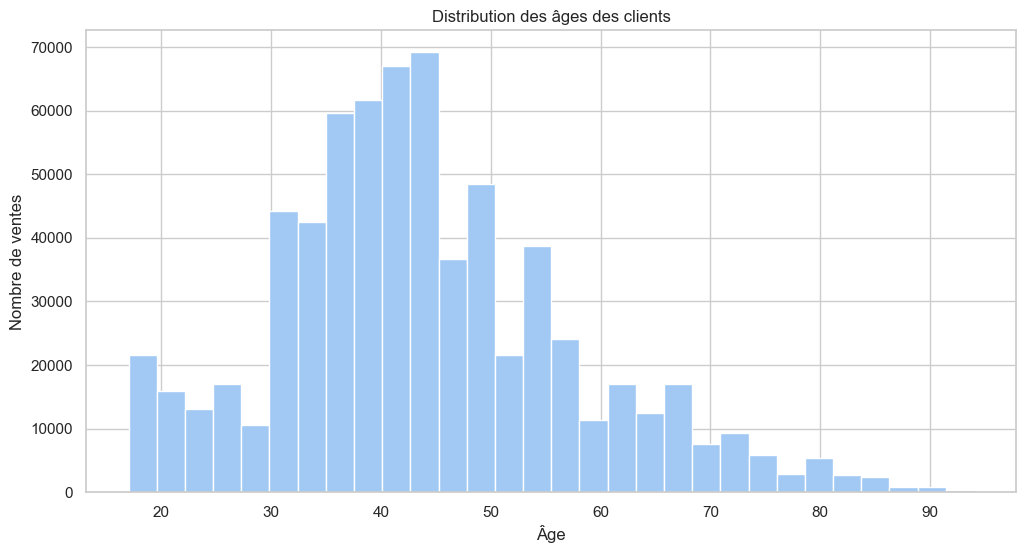

Âge moyen des clients : 43.8 ans


In [27]:
merged_df["age"].describe()

# Histogramme des âges
merged_df["age"].hist(bins=30)
plt.title("Distribution des âges des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de ventes")
plt.show()

age_moyen = merged_df["age"].mean()
print(f"Âge moyen des clients : {age_moyen:.1f} ans")


In [28]:
merged_df["price"].describe()

count    687534.000000
mean         17.493918
std          18.238337
min           0.620000
25%           8.990000
50%          13.990000
75%          19.080000
max         300.000000
Name: price, dtype: float64

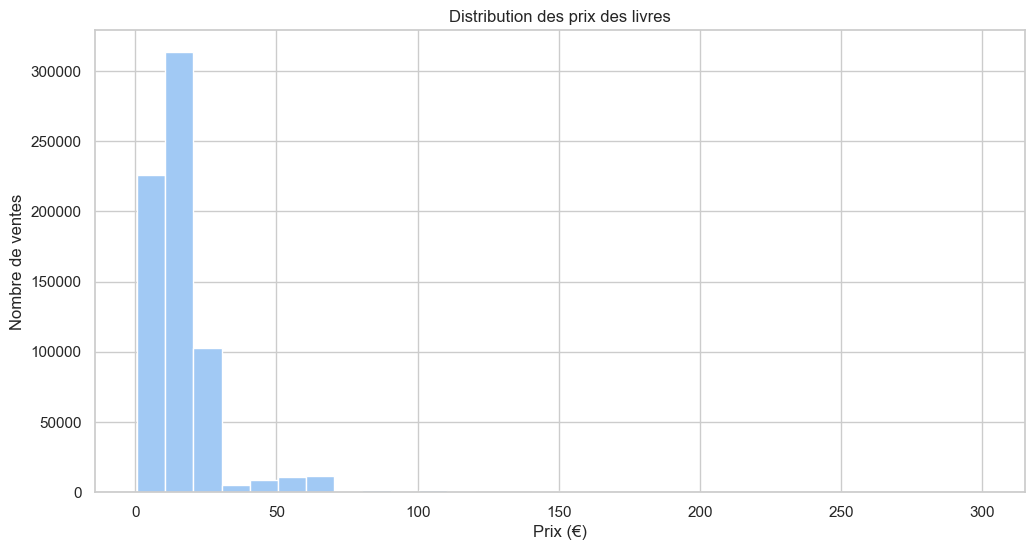

Prix des livres : entre 0.62 € et 300.00 €


In [29]:
merged_df["price"].describe()

# Distribution des prix
merged_df["price"].hist(bins=30)
plt.title("Distribution des prix des livres")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de ventes")
plt.show()

prix_min = merged_df["price"].min()
prix_max = merged_df["price"].max()
print(f"Prix des livres : entre {prix_min:.2f} € et {prix_max:.2f} €")

Catégories uniques : [0 1 2]


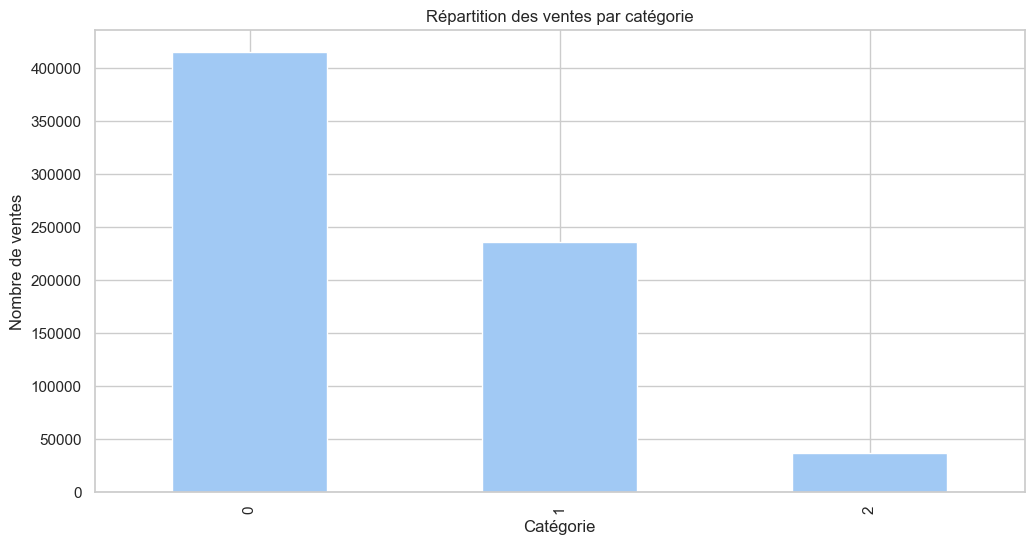

In [30]:
print("Catégories uniques :", merged_df["categ"].unique())
merged_df["categ"].value_counts().plot(kind="bar")
plt.title("Répartition des ventes par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.show()



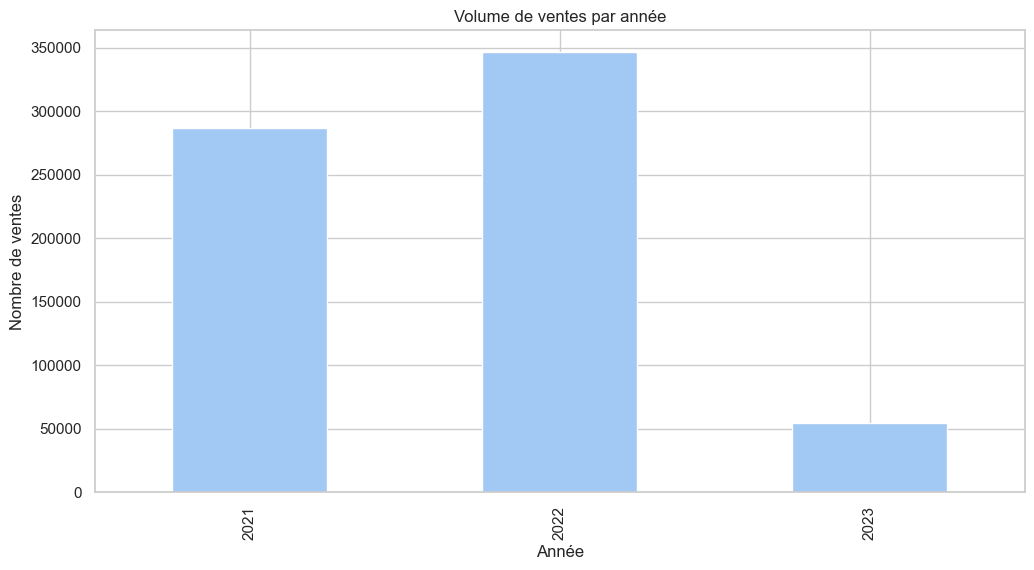

Années couvertes : 2021 à 2023


In [31]:
# Nombre de ventes par année
merged_df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Volume de ventes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de ventes")
plt.show()

annees = merged_df["year"].sort_values().unique()
print(f"Années couvertes : {annees[0]} à {annees[-1]}")

## 🔍 Exploration du DataFrame fusionné

Les données ont été vérifiées après jointure :
- Pas de valeurs manquantes détectées
- Les prix des livres sont compris entre 0,62 et 300 € 
- L’âge moyen des clients est de 44 ans
- Les ventes couvrent deux années : 2021 et 2023

La base est propre et prête à être analysée.

In [33]:
# ✅ Calcul des valeurs clés
prix_min = merged_df["price"].min()
prix_max = merged_df["price"].max()
age_moyen = merged_df["age"].mean()
date_min = merged_df["date"].min()
date_max = merged_df["date"].max()
annees = sorted(merged_df["year"].unique())

# ✅ Génération du texte Markdown
markdown = f"""
## 🔍 Exploration du DataFrame fusionné

Les données ont été vérifiées après jointure :
- Pas de valeurs manquantes détectées
- Les prix des livres sont compris entre **{prix_min:.2f} €** et **{prix_max:.2f} €**
- L’âge moyen des clients est de **{age_moyen:.1f} ans**
- Les ventes s’étendent du **{date_min.strftime('%d %B %Y')}** au **{date_max.strftime('%d %B %Y')}**, ce qui couvre **{len(annees)} années civiles** : {', '.join(map(str, annees))}

La base est propre et prête à être analysée.
"""

print(markdown)


## 🔍 Exploration du DataFrame fusionné

Les données ont été vérifiées après jointure :
- Pas de valeurs manquantes détectées
- Les prix des livres sont compris entre **0.62 €** et **300.00 €**
- L’âge moyen des clients est de **43.8 ans**
- Les ventes s’étendent du **01 March 2021** au **28 February 2023**, ce qui couvre **3 années civiles** : 2021, 2022, 2023

La base est propre et prête à être analysée.



## <a name="section_2_1_1"></a>📈 Évolution du chiffre d’affaires avec moyenne mobile

Nous analysons ici l'évolution mensuelle du chiffre d'affaires (CA) de la librairie en ligne.  
Nous ajoutons également une moyenne mobile (rolling average) pour lisser les variations mensuelles.

In [35]:
# CA total
ca_total = merged_df["price"].sum()
print(f"💰 Chiffre d'affaires total : {ca_total:,.2f} €")

# CA total par année
ca_par_annee = merged_df.groupby("year")["price"].sum().reset_index()
ca_par_annee.columns = ["Année", "Chiffre d'affaires (€)"]

# Affichage propre
ca_par_annee["Chiffre d'affaires (€)"] = ca_par_annee["Chiffre d'affaires (€)"]

display(ca_par_annee)


# Calcul du CA par mois et par année
ca_mensuel = merged_df.groupby(["year", "month"])["price"].sum().reset_index()

# Création d'une colonne date fictive pour tracer une courbe continue
ca_mensuel["date"] = pd.to_datetime(dict(year=ca_mensuel["year"], month=ca_mensuel["month"], day=1))

# Tri chronologique
ca_mensuel = ca_mensuel.sort_values("date")

# Moyenne mobile sur 3 mois
ca_mensuel["CA_moyenne_mobile_3mois"] = ca_mensuel["price"].rolling(window=3).mean()

ca_mensuel.head(20)

💰 Chiffre d'affaires total : 12,027,663.10 €


,Année,Chiffre d'affaires (€)
0,2021,4944760.98
1,2022,6108681.81
2,2023,974220.31


,year,month,price,date,CA_moyenne_mobile_3mois
0,2021,3,482440.61,2021-03-01,NaN
1,2021,4,476109.30,2021-04-01,NaN
2,2021,5,492943.47,2021-05-01,483831.126667
3,2021,6,484088.56,2021-06-01,484380.443333
4,2021,7,482835.40,2021-07-01,486622.476667
5,2021,8,482284.79,2021-08-01,483069.583333
6,2021,9,507240.68,2021-09-01,490786.956667
7,2021,10,494733.16,2021-10-01,494752.876667
8,2021,11,516167.73,2021-11-01,506047.190000
9,2021,12,525917.28,2021-12-01,512272.723333


## 💰 Chiffre d’affaires total

Le chiffre d’affaires cumulé sur la période **du 1er mars 2021 au 28 février 2023** s’élève à :

### **12 027 663,10 €**

Ce montant comprend l’ensemble des ventes réalisées sur le site de la librairie en ligne, tous clients confondus.

## 🗓️ Chiffre d’affaires par année

| Année | Chiffre d'affaires |
|-------|---------------------|
| 2021  | 4 944 760,98 €      |
| 2022  | 6 108 681,81 €      |
| 2023* |   974 220,31 €      |

> Le chiffre d’affaires a progressé entre 2021 et 2022, avec une hausse d’environ **23,6 %**.  
> L’année 2023 n’est représentée que sur **deux mois (janvier-février)**, ce qui explique son faible montant relatif.

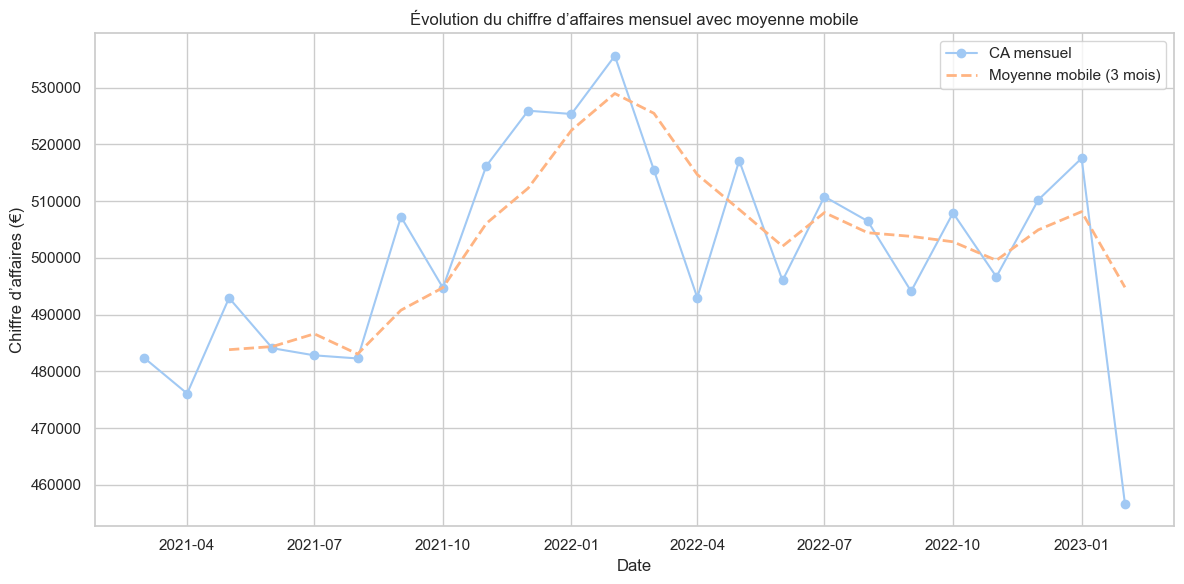

In [38]:
# Affichage du CA avec moyenne mobile
plt.figure(figsize=(12,6))
plt.plot(ca_mensuel["date"], ca_mensuel["price"], label="CA mensuel", marker='o')
plt.plot(ca_mensuel["date"], ca_mensuel["CA_moyenne_mobile_3mois"], label="Moyenne mobile (3 mois)", linestyle='--', linewidth=2)

plt.title("Évolution du chiffre d’affaires mensuel avec moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d’affaires (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## <a name="section_2_1_2"></a>💰 Chiffre d’affaires par catégorie de produits

Cette section présente la répartition du chiffre d’affaires par catégorie de produits vendus.  
Elle permet d’identifier les familles de livres les plus génératrices de revenus.

In [40]:
# CA total par catégorie
ca_par_categorie = merged_df.groupby("categ")["price"].sum().reset_index()

ca_par_categorie = ca_par_categorie.sort_values("price", ascending=False)
ca_par_categorie.head()

,categ,price
1,1,4827657.11
0,0,4419730.97
2,2,2780275.02


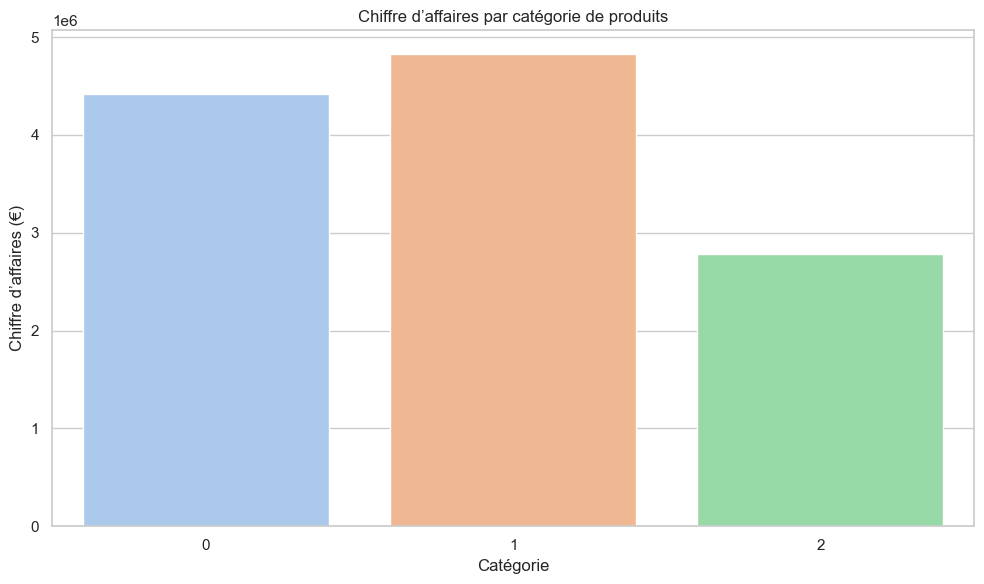

In [41]:
# Graphique en barres
plt.figure(figsize=(10,6))
sns.barplot(data=ca_par_categorie, x="categ", y="price")

plt.title("Chiffre d’affaires par catégorie de produits")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d’affaires (€)")
plt.tight_layout()
plt.show()

# modifier en diagramme circulaire avec les pourcentages

> On constate que la catégorie **1** génère la plus grande part du chiffre d’affaires.  
> Cela permet de cibler les efforts marketing ou d’élargir l’offre dans cette catégorie.

## <a name="section_2_2_1"></a>🏆 Produits les plus & les moins vendus

Cette section présente les livres les plus vendus (top) et les moins vendus (flop) en nombre de ventes.  
Cela permet d’identifier les succès commerciaux et les références moins performantes à retraiter ou repenser.

In [44]:
# Nombre de ventes par produit
ventes_par_produit = merged_df.groupby("id_prod")["session_id"].count().reset_index()
ventes_par_produit = ventes_par_produit.rename(columns={"session_id": "nb_ventes"})

# TOP 10
top_10 = ventes_par_produit.sort_values("nb_ventes", ascending=False).head(10)

# FLOP 10 (hors produits non vendus si tu les as dans la base produit seule)
flop_10 = ventes_par_produit.sort_values("nb_ventes", ascending=True).head(10)

top_10, flop_10

(     id_prod  nb_ventes
 2591   1_369       2340
 2644   1_417       2269
 2641   1_414       2246
 2733   1_498       2202
 2653   1_425       2163
 2629   1_403       2040
 2640   1_413       2036
 2639   1_412       2014
 2632   1_406       2003
 2633   1_407       2001,
      id_prod  nb_ventes
 1327  0_2201          1
 802   0_1728          1
 2108   0_833          1
 2079   0_807          1
 595   0_1539          1
 698   0_1633          1
 166   0_1151          1
 752   0_1683          1
 549   0_1498          1
 3263    2_98          1)

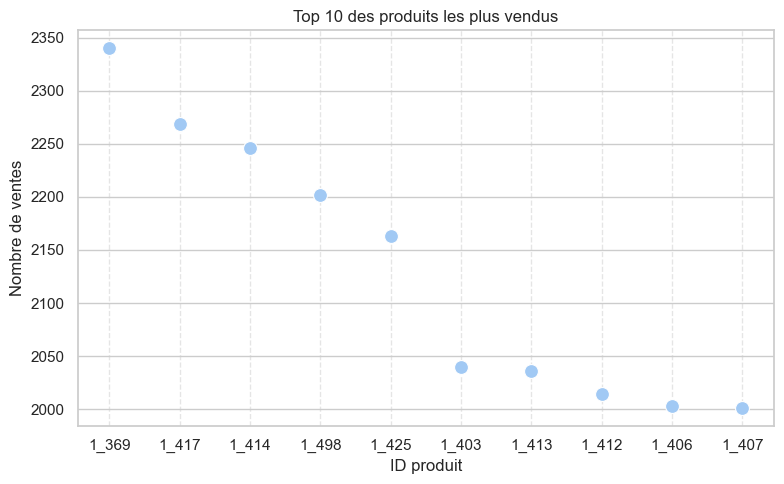

,id_prod,nb_ventes
166,0_1151,1
313,0_1284,1
417,0_1379,1
549,0_1498,1
595,0_1539,1
665,0_1601,1
698,0_1633,1
752,0_1683,1
802,0_1728,1
1327,0_2201,1


In [45]:
# TOP 10 - Dot plot horizontal
plt.figure(figsize=(8,5))
sns.scatterplot(data=top_10, y="nb_ventes", x="id_prod", s=100)
plt.title("Top 10 des produits les plus vendus")
plt.xlabel("ID produit")
plt.ylabel("Nombre de ventes")
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Flop 10 (même si tous à 1 vente)
flop_10 = ventes_par_produit[ventes_par_produit["nb_ventes"] == 1].head(10)
display(flop_10)

# inverser les axes 


> Les produits du Top 10 réalisent chacun entre 2000 et 2350 ventes

> Les produits les moins vendus (flop 10) ont tous été achetés **une seule fois**.  
> Cela peut traduire un manque de visibilité, une mauvaise adéquation avec la clientèle ou une fiche produit mal optimisée.  
> Il serait pertinent d’analyser plus largement les références vendues une seule fois pour comprendre pourquoi.

## <a name="section_2_2_2"></a>💸 Prix des produits selon leurs catégories

Cette section analyse la répartition des prix des produits par catégorie.  
L’objectif est d’observer les tendances tarifaires par type de livre (BD, Roman, Scolaire, etc.) et de repérer d’éventuelles anomalies ou opportunités d’ajustement tarifaire.

In [49]:
# Statistiques descriptives des prix par catégorie
merged_df.groupby("categ")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0,415459.0,10.638188,4.933527,0.62,6.29,9.99,14.45,40.99
1,235592.0,20.491600,7.579606,2.00,15.81,19.08,24.98,80.99
2,36483.0,76.207412,39.749015,30.99,53.99,62.83,73.72,300.00


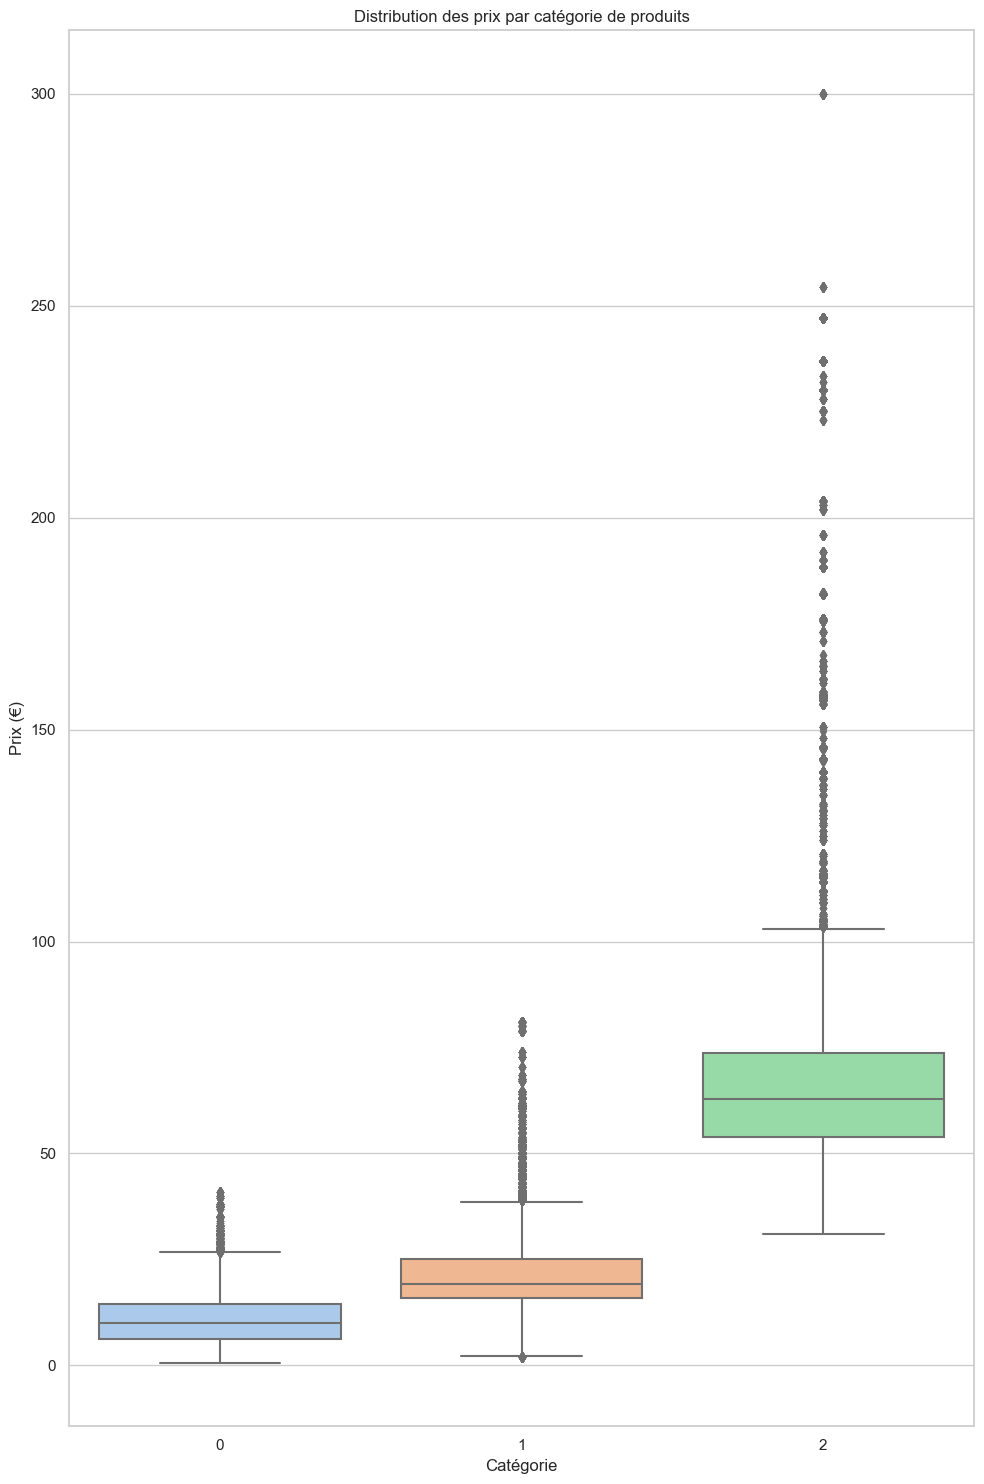

In [50]:
plt.figure(figsize=(10,15))
sns.boxplot(data=merged_df, x="categ", y="price")

plt.title("Distribution des prix par catégorie de produits")
plt.xlabel("Catégorie")
plt.ylabel("Prix (€)")
plt.tight_layout()
plt.show()

> On observe que la catégorie **2** présente les prix les plus élevés en moyenne, tandis que **0** est la moins chère.  
> Ce type d'analyse permet de mieux comprendre le positionnement tarifaire de chaque gamme.

## <a name="section_2_3_1"></a>🧑‍💼 Profil des clients selon leurs âges

Cette section explore la répartition des clients par âge ainsi que le lien entre l’âge et le comportement d’achat.  
L’objectif est d’identifier des profils types selon les tranches d’âges.

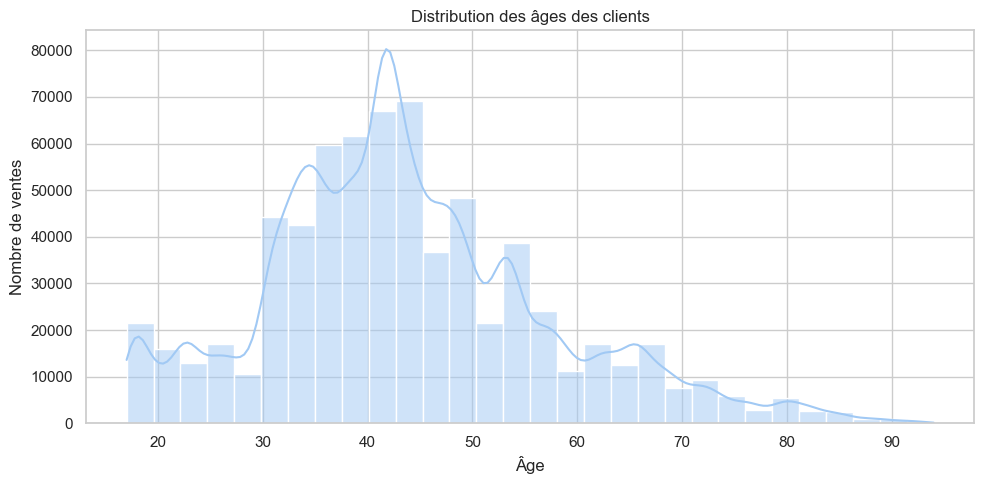

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df["age"], bins=30, kde=True)

plt.title("Distribution des âges des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de ventes")
plt.tight_layout()
plt.show()

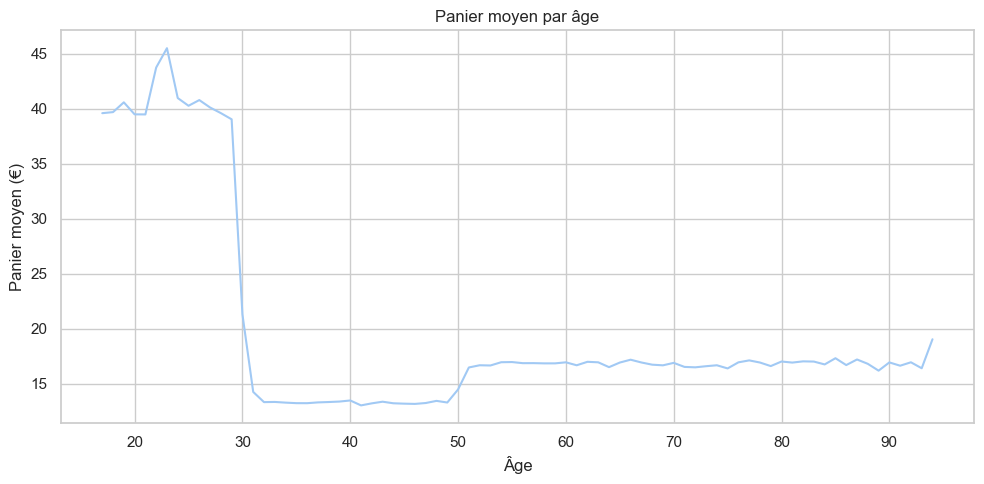

In [54]:
# Calcul du panier moyen par âge
panier_par_age = merged_df.groupby("age")["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=panier_par_age, x="age", y="price")

plt.title("Panier moyen par âge")
plt.xlabel("Âge")
plt.ylabel("Panier moyen (€)")
plt.tight_layout()
plt.show()

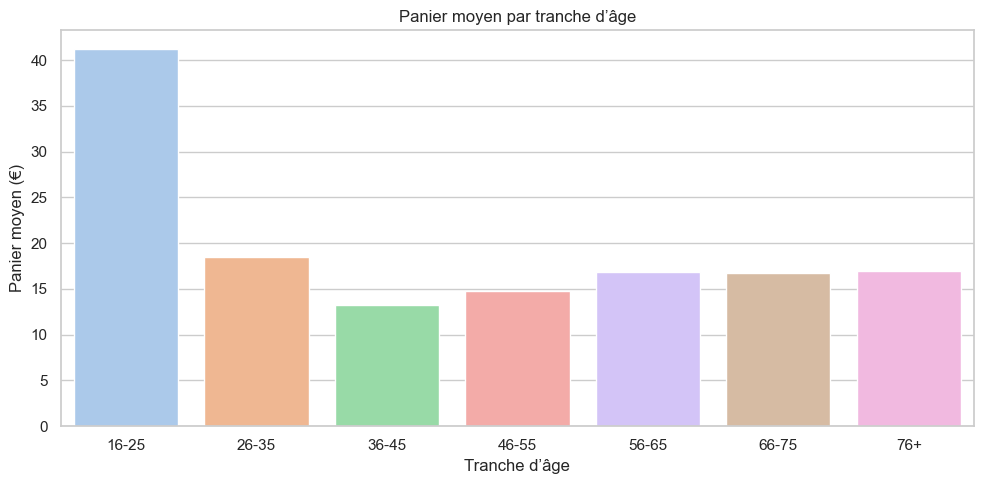

In [55]:
# Ajout de tranches d'âge
merged_df["tranche_age"] = pd.cut(merged_df["age"],
                                   bins=[15, 25, 35, 45, 55, 65, 75, 100],
                                   labels=["16-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76+"])

# CA moyen par tranche d'âge
ca_tranche = merged_df.groupby("tranche_age")["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=ca_tranche, x="tranche_age", y="price")
plt.title("Panier moyen par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Panier moyen (€)")
plt.tight_layout()
plt.show()


# ajouter les catégories imbriquées

> Les clients âgés de 15-25 ans présentent un panier moyen plus élevé que les autres.  
> Cela pourrait suggérer un pouvoir d’achat plus important, ou un intérêt plus marqué pour certaines catégories de livres.

In [57]:
merged_df[merged_df["tranche_age"] == "16-25"]["categ"].value_counts(normalize=True)

categ
2    0.410261
1    0.388943
0    0.200796
Name: proportion, dtype: float64


>Contrairement aux attentes, les 16–25 ans présentent un panier moyen supérieur à toutes les >autres tranches, en particulier dans les catégories 1 et 2.
>Cela en fait une cible marketing à fort potentiel, à activer via des campagnes ciblées ou des >offres spécifiques.

## <a name="section_2_3_2"></a>📊 Répartition du chiffre d’affaires entre les clients

Cette section permet d’observer la distribution du chiffre d’affaires entre les clients, afin de mesurer l’inégalité de contribution.  
Pour cela, on utilise une **courbe de Lorenz**, un outil issu de l’analyse économique.

In [60]:
# CA total par client
ca_par_client = merged_df.groupby("client_id")["price"].sum().sort_values().reset_index()

# Calcul cumulé
ca_par_client["part_cumulee"] = ca_par_client["price"].cumsum() / ca_par_client["price"].sum()
ca_par_client["part_clients"] = (np.arange(1, len(ca_par_client)+1)) / len(ca_par_client)

ca_par_client.head(10)

,client_id,price,part_cumulee,part_clients
0,c_8351,6.31,5.246239e-07,0.000116
1,c_8140,8.30,1.214700e-06,0.000233
2,c_8114,9.98,2.044454e-06,0.000349
3,c_4648,11.20,2.975640e-06,0.000465
4,c_4478,13.36,4.086413e-06,0.000581
5,c_6040,15.72,5.393400e-06,0.000698
6,c_5919,15.98,6.722004e-06,0.000814
7,c_5829,16.07,8.058091e-06,0.000930
8,c_8032,17.64,9.524710e-06,0.001047
9,c_4976,17.89,1.101211e-05,0.001163


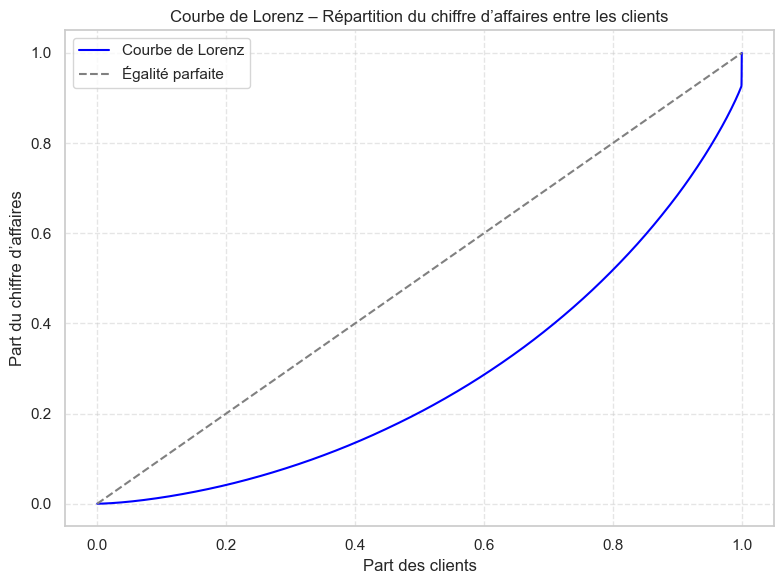

In [61]:
plt.figure(figsize=(8, 6))

# Courbe de Lorenz
plt.plot(ca_par_client["part_clients"], ca_par_client["part_cumulee"], label="Courbe de Lorenz", color="blue")

# Ligne d’égalité parfaite
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Égalité parfaite")

plt.title("Courbe de Lorenz – Répartition du chiffre d’affaires entre les clients")
plt.xlabel("Part des clients")
plt.ylabel("Part du chiffre d’affaires")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

> La courbe de Lorenz révèle une forte inégalité dans la répartition du chiffre d’affaires.  
> On constate que **80 % du CA est généré par environ 95 % des clients**, ce qui implique que **les 5 % restants concentrent à eux seuls 20 % du CA**.  
> Cela confirme l’existence de **clients stratégiques**, à fort pouvoir d’achat ou à activité très régulière (probablement BtoB).

## <a name="section_2_3_3"></a>💎 Clients les plus importants dans le chiffre d’affaires

Dans cette section, nous identifions les clients qui génèrent le plus de chiffre d’affaires.  
Cela permet de mettre en place des actions de fidélisation ou de suivi personnalisé pour les clients stratégiques.

In [64]:
# Top 10 clients par CA
top_clients = merged_df.groupby("client_id")["price"].sum().reset_index()
top_clients = top_clients.rename(columns={"price": "CA_total"})
top_clients = top_clients.sort_values("CA_total", ascending=False).reset_index(drop=True)
top_clients.index = top_clients.index + 1  # Classement

display(top_clients.head(10))

,client_id,CA_total
1,c_1609,326039.89
2,c_4958,290227.03
3,c_6714,153918.60
4,c_3454,114110.57
5,c_1570,5285.82
6,c_3263,5276.87
7,c_2140,5260.18
8,c_2899,5214.05
9,c_7319,5155.77
10,c_7959,5135.75


In [65]:
merged_df[merged_df["client_id"] == "c_1609"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,age,month,month_name,day,tranche_age
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,m,1980,5.86,0,2021,41,3,March,2021-03-01,36-45
13,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,m,1980,7.99,0,2021,41,3,March,2021-03-01,36-45
78,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,m,1980,12.99,0,2021,41,3,March,2021-03-01,36-45
88,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,m,1980,14.99,0,2021,41,3,March,2021-03-01,36-45
101,1_406,2021-03-01 02:41:13.649521,s_63,c_1609,m,1980,24.81,1,2021,41,3,March,2021-03-01,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687437,1_735,2023-02-28 21:42:40.632842,s_348401,c_1609,m,1980,22.99,1,2023,43,2,February,2023-02-28,36-45
687451,0_1594,2023-02-28 22:04:16.664518,s_348409,c_1609,m,1980,3.33,0,2023,43,2,February,2023-02-28,36-45
687454,0_1940,2023-02-28 22:09:50.559145,s_348409,c_1609,m,1980,18.31,0,2023,43,2,February,2023-02-28,36-45
687468,0_1002,2023-02-28 22:27:00.464046,s_348409,c_1609,m,1980,8.31,0,2023,43,2,February,2023-02-28,36-45


In [66]:
merged_df[merged_df["client_id"] == "c_1609"].shape[0]

25586

In [67]:
merged_df[merged_df["client_id"] == "c_1609"]["price"].sum()

326039.89

In [68]:
merged_df["client_id"].value_counts().head(10)

client_id
c_1609    25586
c_6714     9199
c_3454     6793
c_4958     5222
c_2140      405
c_3263      403
c_2595      398
c_2077      386
c_1637      384
c_7421      381
Name: count, dtype: int64

> on constate que les 4 premiers clients du top 10 sont nos clients BtoB étant donné le volume de ventes et de chiffre d'affaire généré

In [70]:
# Nombre de transactions par client
transactions_par_client = merged_df["client_id"].value_counts()

# Hypothèse : BtoB = clients avec > 5000 transactions
clients_b2b = transactions_par_client[transactions_par_client > 5000].index.tolist()

# Ajout d'une colonne type_client
merged_df["type_client"] = merged_df["client_id"].apply(lambda x: "BtoB" if x in clients_b2b else "BtoC")

print(merged_df)

       id_prod                       date session_id client_id sex  birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m   1960   
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m   1988   
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f   1989   
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f   1956   
...        ...                        ...        ...       ...  ..    ...   
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573   f   1996   
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50   f   1994   
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488   f   1985   
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848   m   1953   
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575   f   1981   

        price  categ  year  age  month month_name         day tranche_age  

In [71]:
# CA total par type de client
ca_par_type = merged_df.groupby("type_client")["price"].sum().reset_index()
ca_par_type["part_du_total"] = ca_par_type["price"] / ca_par_type["price"].sum() * 100
display(ca_par_type)

,type_client,price,part_du_total
0,BtoB,884296.09,7.352185
1,BtoC,11143367.01,92.647815


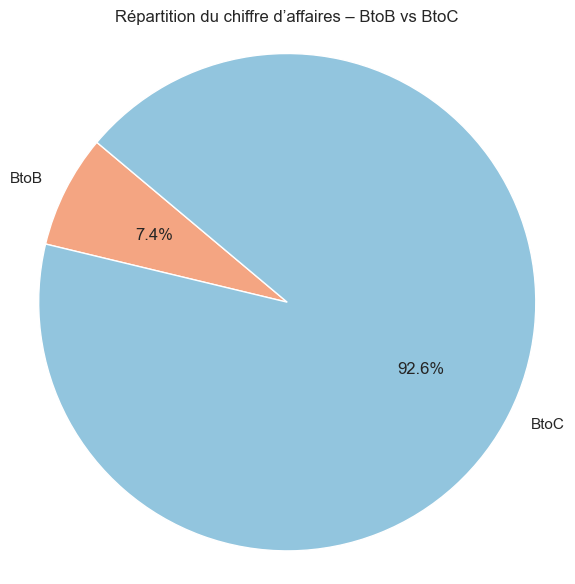

In [72]:
# Données à partir de ca_par_type
labels = ca_par_type["type_client"]
sizes = ca_par_type["price"]
colors = ["#f4a582", "#92c5de"]  # BtoB / BtoC

# Camembert
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Répartition du chiffre d’affaires – BtoB vs BtoC")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [73]:
nb_clients_par_type = merged_df.groupby("type_client")["client_id"].nunique().reset_index(name="nb_clients")
display(nb_clients_par_type)

,type_client,nb_clients
0,BtoB,4
1,BtoC,8596


In [74]:
nb_transactions = merged_df["type_client"].value_counts()
display(nb_transactions)

type_client
BtoC    640734
BtoB     46800
Name: count, dtype: int64

## 🧮 Répartition BtoB / BtoC

Avant d'exclure les clients BtoB pour les tests statistiques, nous avons comparé leurs indicateurs :

- Les clients BtoB représentent 7,35 % du CA total, pour seulement 0,04 % du nombre de clients
- Ils concentrent 6,80 % des transactions
- Leur comportement est très différent des clients BtoC → justifie une analyse distincte

→ Ces clients seront exclus du notebook statistique pour ne pas biaiser les résultats.

In [76]:
# DataFrame sans les clients BtoB
df_sans_b2b = merged_df[~merged_df["client_id"].isin(clients_b2b)].copy()



In [77]:
# vérification du nouveau df

print(f"✅ Données initiales : {merged_df.shape[0]} lignes")
print(f"✅ Données après exclusion BtoB : {df_sans_b2b.shape[0]} lignes")
print(f"📉 Nombre de lignes retirées : {merged_df.shape[0] - df_sans_b2b.shape[0]}")
print(f"👤 Nombre de clients restants : {df_sans_b2b['client_id'].nunique()}")

✅ Données initiales : 687534 lignes
✅ Données après exclusion BtoB : 640734 lignes
📉 Nombre de lignes retirées : 46800
👤 Nombre de clients restants : 8596


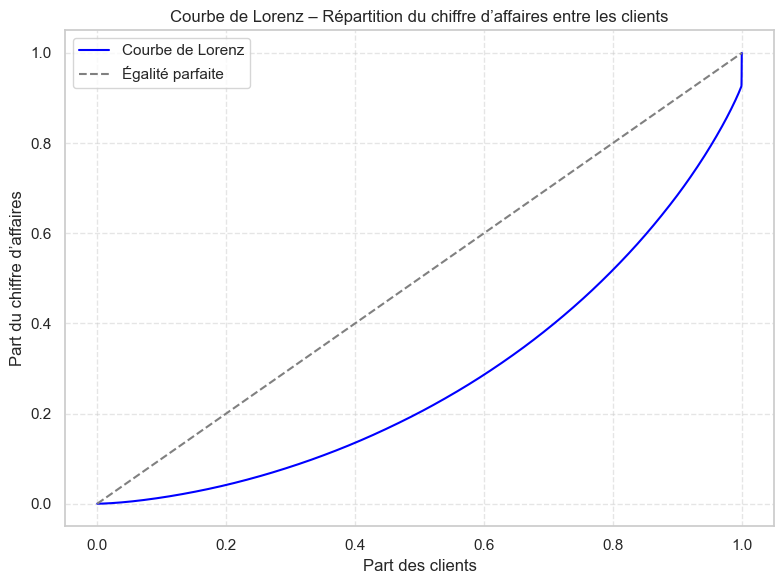

In [78]:
plt.figure(figsize=(8, 6))

# Courbe de Lorenz
plt.plot(ca_par_client["part_clients"], ca_par_client["part_cumulee"], label="Courbe de Lorenz", color="blue")

# Ligne d’égalité parfaite
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Égalité parfaite")

plt.title("Courbe de Lorenz – Répartition du chiffre d’affaires entre les clients")
plt.xlabel("Part des clients")
plt.ylabel("Part du chiffre d’affaires")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## <a name="chapter3"></a>📊 Analyses des comportements des clients

Cette section vise à mieux comprendre les comportements d'achat des clients à travers l’analyse de **corrélations statistiques** entre certaines variables : genre, âge, fréquence, catégories et montants.

Chaque sous-section suit une méthodologie rigoureuse :
- Visualisation des données
- Vérification des hypothèses (normalité si besoin)
- Choix du test adapté
- Interprétation des résultats

## 🧠 Choix des tests statistiques selon le type de variables

Avant de réaliser les tests, il est essentiel de bien identifier le type de variables en jeu.  
Voici un tableau récapitulatif des tests adaptés selon les cas :

| Type de variables                     | Test recommandé              | Vérification de normalité requise ? |
|--------------------------------------|------------------------------|--------------------------------------|
| **Catégorielle x Catégorielle**      | Khi² d’indépendance          | ❌ Non                                |
| **Quantitative x Quantitative**      | Pearson (si normalité)       | ✅ Oui                                |
|                                      | Spearman (si non-normalité)  | ❌ Non                                |
| **Quantitative x Catégorielle (2 modalités)** | Test de Student           | ✅ Oui                                |
| **Quantitative x Catégorielle (>2 modalités)** | ANOVA                    | ✅ Oui                                |

Ce tableau servira de base pour justifier le choix de chaque test statistique dans l'analyse suivante.

## <a name="section_2_3_4"></a>📚 Corrélation entre le genre des clients et les catégories de livres achetés

### 🎯 Justification du choix du test du Khi² d’indépendance

Dans cette analyse, nous cherchons à déterminer s'il existe une dépendance entre le **genre** du client (homme/femme) et la **catégorie de livres achetée**.

Le **test du Khi²** est pleinement justifié ici car :
- Le tableau de contingence est **rempli** de grandes valeurs,
- **Toutes les cases** contiennent **un nombre d’observations largement suffisant**,
- L’utilisation du test exact de Fisher n'est **ni nécessaire ni adaptée** à de tels volumes.

👉 Nous utilisons donc le **test du Khi² d’indépendance** pour analyser le lien entre **genre** et **catégorie de livres**.

L’hypothèse nulle (H₀) : *le genre et la catégorie de livre achetée sont indépendants*.  
L’hypothèse alternative (H₁) : *le genre influence la répartition des catégories achetées*.

In [82]:
print("Modalités de genre :", df_sans_b2b["sex"].unique())
print("Modalités de catégorie :", df_sans_b2b["categ"].unique())

Modalités de genre : ['f' 'm']
Modalités de catégorie : [0 1 2]


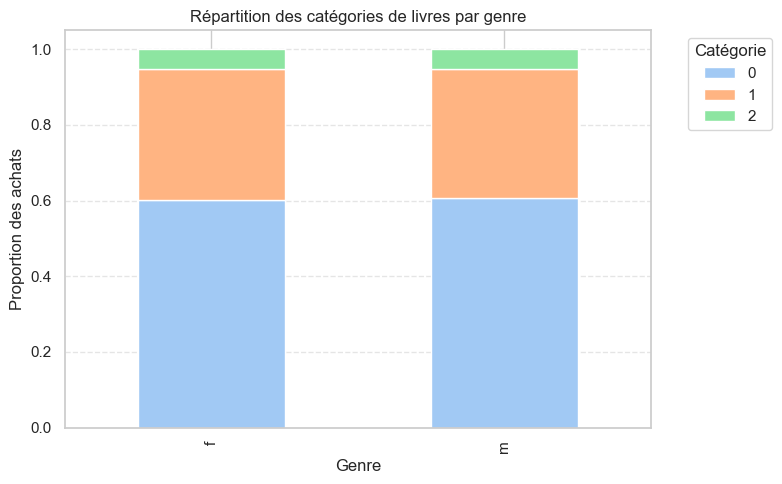

In [83]:
# Tableau croisé : genre x catégorie
genre_categ = pd.crosstab(df_sans_b2b["sex"], df_sans_b2b["categ"])

# Normalisation ligne à 1 (proportions par genre)
genre_categ_norm = genre_categ.div(genre_categ.sum(axis=1), axis=0)

# Graphique en barres empilées
genre_categ_norm.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Répartition des catégories de livres par genre")
plt.xlabel("Genre")
plt.ylabel("Proportion des achats")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🎓 Test choisi : Khi² d’indépendance

- ❓ Hypothèse nulle (H₀) : le genre et la catégorie sont **indépendants**
- ❗ Hypothèse alternative (H₁) : le genre **influence** la catégorie achetée

✅ Ce test s’applique car :
- Les deux variables sont **catégorielles**
- On a **plus de 5 observations par case**

In [85]:
from scipy.stats import chi2_contingency

# Test khi²
chi2, p, dof, expected = chi2_contingency(genre_categ)

print(f"📈 Statistique khi² : {chi2:.2f}")
print(f"🎯 p-value : {p:.4f}")

📈 Statistique khi² : 22.67
🎯 p-value : 0.0000


### 🧪 Résultat du test khi²

- Statistique khi² : **22,67**
- p-value : **< 0,0001**

> La p-value est **très inférieure au seuil de 0,05**, ce qui signifie que nous **rejetons l’hypothèse d’indépendance** entre les deux variables.  
> 👉 Il existe une **relation significative** entre le **genre du client** et la **catégorie de livres achetés**.

Cette conclusion indique que les préférences en matière de catégories de livres diffèrent selon le genre, ce qui peut orienter les stratégies de recommandation ou de ciblage marketing.

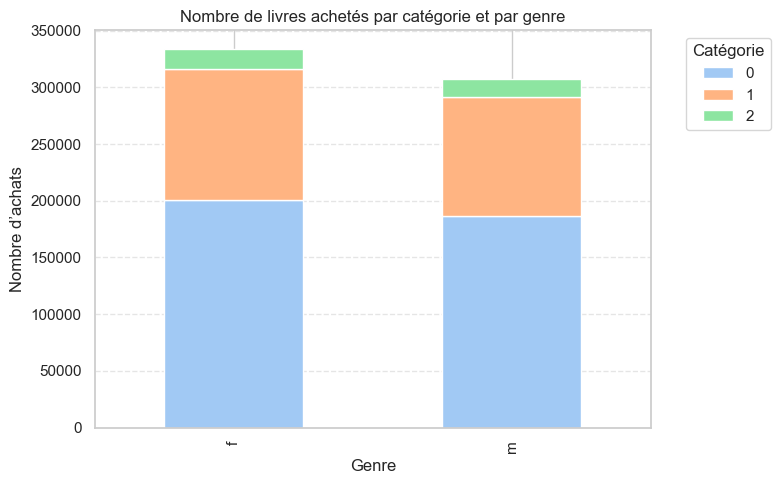

In [87]:
# Tableau croisé : genre x catégorie (valeurs absolues)
genre_categ = pd.crosstab(df_sans_b2b["sex"], df_sans_b2b["categ"])

# Graphique en barres empilées (effectifs absolus)
genre_categ.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Nombre de livres achetés par catégorie et par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre d’achats")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Le graphique précédent montrait des proportions similaires entre les genres.  
Cependant, le graphique ci-dessus montre les **effectifs réels**, sur lesquels le test khi² est basé.  


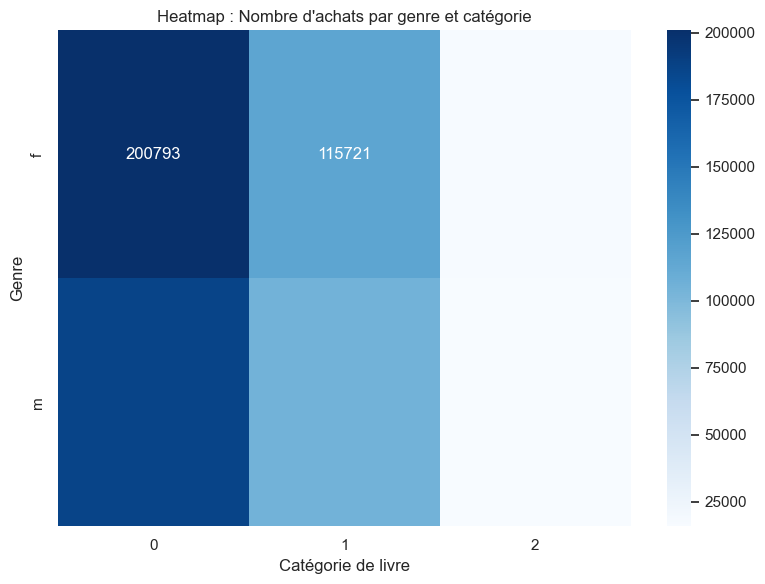

In [89]:
#faire une heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap du tableau croisé
plt.figure(figsize=(8,6))
sns.heatmap(genre_categ, annot=True, fmt='d', cmap="Blues")
plt.title("Heatmap : Nombre d'achats par genre et catégorie")
plt.xlabel("Catégorie de livre")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

📈 Statistique Chi-2 : 22.67
🎯 Valeur p : 0.0000
📚 Degrés de liberté : 2

📋 Fréquences attendues :
categ              0              1             2
sex                                              
f      201574.896625  114822.131914  17096.971461
m      185706.103375  105782.868086  15751.028539

✅ Conclusion : Relation significative entre le genre et la catégorie de livres achetés.


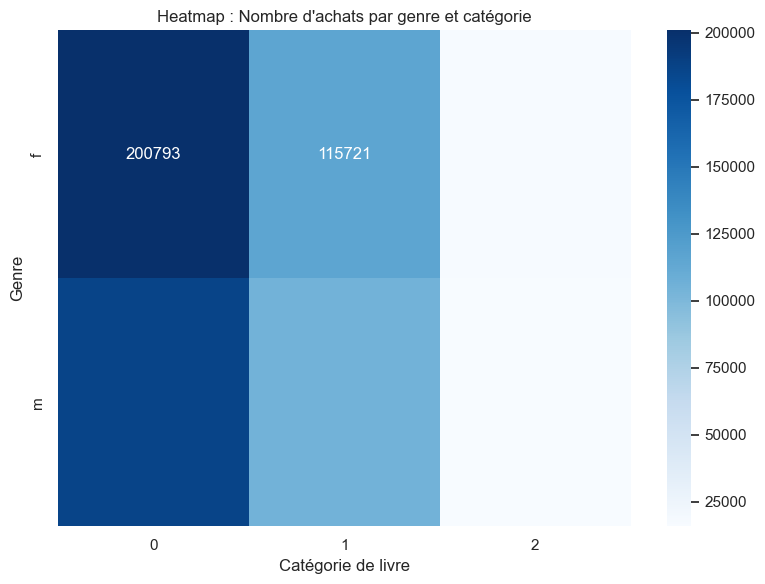

In [90]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Créer le tableau de contingence
contingency_table = pd.crosstab(df_sans_b2b['sex'], df_sans_b2b['categ'])

# 2. Calculer le test du Khi-2
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 3. Affichage des résultats
print(f"📈 Statistique Chi-2 : {chi2_stat:.2f}")
print(f"🎯 Valeur p : {p_value:.4f}")
print(f"📚 Degrés de liberté : {dof}")
print("\n📋 Fréquences attendues :")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# 4. Décision basée sur la p-value
if p_value < 0.05:
    print("\n✅ Conclusion : Relation significative entre le genre et la catégorie de livres achetés.")
else:
    print("\n❌ Conclusion : Pas de relation significative entre le genre et la catégorie.")

# 5. Bonus - Heatmap de la table de contingence (effectifs)
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="Blues")
plt.title("Heatmap : Nombre d'achats par genre et catégorie")
plt.xlabel("Catégorie de livre")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### 🧪 Comparaison de la statistique khi² au seuil critique

Outre l’interprétation via la p-value, nous vérifions la significativité en comparant la statistique khi² obtenue à la valeur critique extraite de la table de loi du khi² pour un seuil de 5 %.

In [92]:
from scipy.stats import chi2


# Calcul de la valeur critique (dof = degrés de liberté du test)
seuil_critique = chi2.ppf(0.95, dof)  # 95% de confiance
print(f"✅ Valeur critique (seuil 5%) : {seuil_critique:.2f}")

# Comparaison
if chi2_stat > seuil_critique:
    print("✅ Conclusion : La statistique khi² dépasse la valeur critique → Rejet de H0 (relation significative)")
else:
    print("❌ Conclusion : La statistique khi² ne dépasse pas la valeur critique → Non rejet de H0")

✅ Valeur critique (seuil 5%) : 5.99
✅ Conclusion : La statistique khi² dépasse la valeur critique → Rejet de H0 (relation significative)


### 📈 Conclusion du test khi²

- Statistique observée : 22.67
- Valeur critique au seuil de 5 % : 5.99
- p-value : 0.0000

> La statistique observée est supérieure à la valeur critique, et la p-value est très inférieure à 0.05.  
> 👉 Nous rejetons l’hypothèse d’indépendance : **le genre influence significativement les catégories de livres achetées**.

In [94]:
X = "sex"
Y = "categ"
cont = df_sans_b2b[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

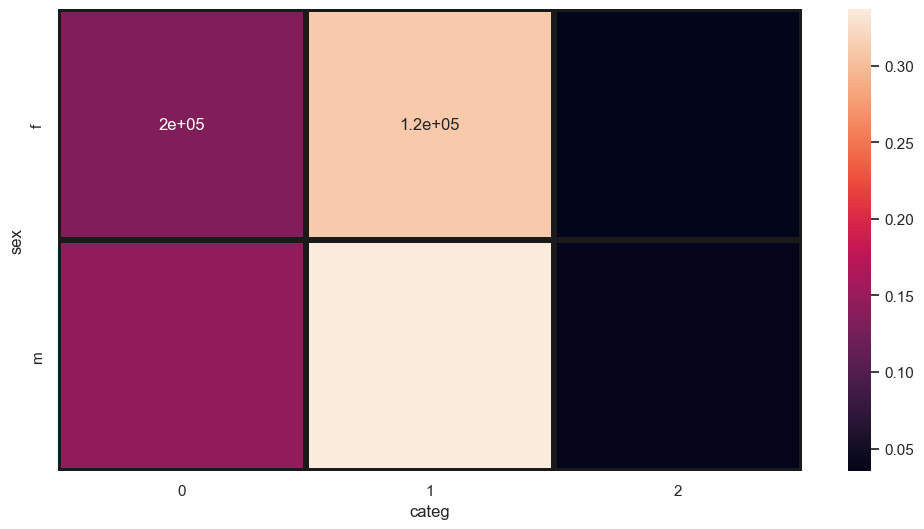

In [95]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_sans_b2b)
indep = tx.dot(ty) / n
c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], linewidths=4, linecolor="k")
plt.show()

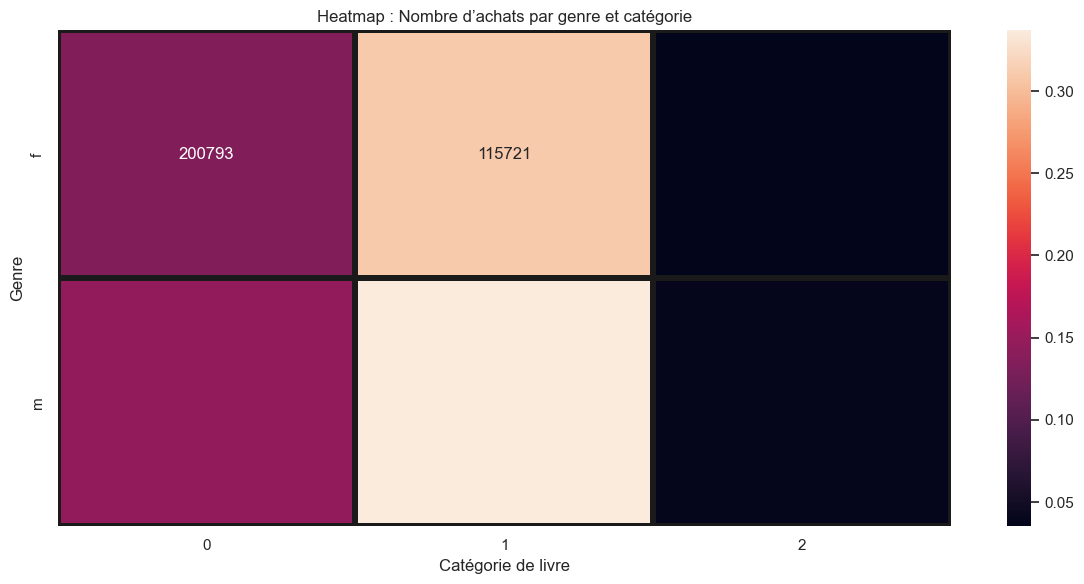

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

X = "sex"
Y = "categ"

# Table de contingence
cont = df_sans_b2b[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Suppression de la ligne et colonne "Total" pour la suite des calculs
cont_wo_total = cont.loc[cont.index != "Total", cont.columns != "Total"]

# Calcul des effectifs théoriques
tx = cont.loc[:, ["Total"]]
ty = cont.loc[["Total"], :]
n = len(df_sans_b2b)
indep = tx.dot(ty) / n

# Calcul de la statistique khi² normalisée
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

# Génération des annotations sans notation scientifique
annot_vals = cont_wo_total.astype(int).astype(str)

# Affichage de la heatmap
sns.heatmap(
    table.iloc[:-1, :-1],  # on retire la ligne/colonne "Total"
    annot=annot_vals,
    fmt="s",
    linewidths=4,
    linecolor="k",
    cmap="rocket",
    cbar=True
)

plt.title("Heatmap : Nombre d’achats par genre et catégorie")
plt.xlabel("Catégorie de livre")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [97]:
print(cont)

categ       0       1      2     All
sex                                 
f      200793  115721  16980  333494
m      186488  104884  15868  307240
All    387281  220605  32848  640734


### 🔍 Heatmap des contributions individuelles au test du Khi²

Au-delà de la p-value globale du test du Khi², il est important de comprendre **quelles cellules du tableau croisé** contribuent réellement à la significativité du test.

La heatmap ci-dessous ne montre pas seulement les effectifs, mais **la contribution de chaque cellule** à la statistique totale du Khi² :

- Les **couleurs claires** indiquent une **forte contribution** au khi² (donc un **écart important** entre les valeurs observées et attendues).
- Les **couleurs foncées** indiquent que la cellule est **proche de l’indépendance attendue**, donc elle **n’explique pas** la significativité.

---

### 🧠 Interprétation dans notre cas (genre ↔ catégorie de livres)

On observe que :
- La **catégorie 1**, notamment pour les femmes, est celle qui **contribue le plus** à la statistique du khi².
- La **catégorie 2**, en revanche, ne montre **aucune contribution notable** (valeurs très faibles et équilibrées entre les sexes).
- Cela signifie que l’effet de genre est **principalement porté par une surreprésentation des femmes dans la catégorie 1**, par rapport à ce que l’on attendrait si le genre et la catégorie étaient indépendants.

---

### ✅ Conclusion

> La significativité du test khi² ne provient **pas d’un effet global**, mais plutôt d’un **effet localisé sur certaines catégories**.  
> Cette visualisation permet d’identifier **où** le lien statistique se manifeste, et donc de **formuler des hypothèses plus précises** sur le comportement des clients selon leur genre.

In [99]:
xi_n

22.66856665178056

**Xi_n étant supérieur à notre valeur critique**, nous rejetons H0, il existe une **dépendance entre le genre des clients et la catégorie des produits achetés**. \
Cette relation est la **plus forte au sein la catégorie 0**, comme le montre la heatmap.

In [101]:
# age et categorie, quanti, quali, test normalité avec chapiro sur l'âge, on vérifie p value, si < 0,05 c'est validé. visuel boxplot pour representer la distribution de l'age selon les catégories. test smirnoff si pas de normalité

## <a name="section_3_2"></a>📊 Relation entre l'âge et la catégorie de livres achetés

Dans cette section, nous cherchons à analyser si l’**âge des clients** influence le **type de livres qu’ils achètent**, représenté ici par la variable `categ`.

### 🔍 Hypothèse de travail

- H₀ : L’âge des clients **ne varie pas significativement** entre les catégories de livres achetées.
- H₁ : Il existe une différence significative d’âge entre au moins deux catégories.

Nous allons procéder en plusieurs étapes :
1. **Visualiser** la distribution de l’âge pour chaque catégorie à l’aide d’un **boxplot**.
2. **Tester la normalité** de l’âge dans chaque catégorie via le test de **Shapiro-Wilk**.
3. Choisir un **test statistique approprié** (ANOVA ou Kolmogorov-Smirnov).
4. En complément, explorer une **corrélation monotone** avec Spearman ou linéaire avec Pearson.

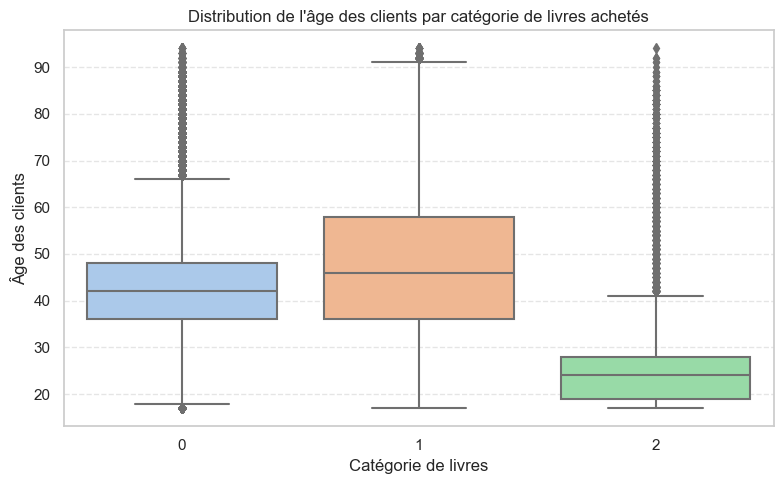

In [103]:
# visualisation par boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sans_b2b, x="categ", y="age")
plt.title("Distribution de l'âge des clients par catégorie de livres achetés")
plt.xlabel("Catégorie de livres")
plt.ylabel("Âge des clients")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 📊 Analyse visuelle du boxplot

Le boxplot permet de visualiser la **distribution de l’âge des clients** pour chaque **catégorie de livres achetés**.

On observe clairement des **différences notables** entre les groupes :

- Les clients ayant acheté des livres de la **catégorie 2** sont **nettement plus jeunes** : la médiane est très basse, et l’ensemble des valeurs est concentré entre environ 18 et 30 ans.
- La **catégorie 1** semble être privilégiée par des clients plus âgés, avec une médiane d’âge plus élevée et une plus grande dispersion.
- La **catégorie 0** présente une population plus mixte, avec une répartition plus équilibrée entre jeunes et moins jeunes.

Cette première visualisation **suggère une possible influence de l’âge sur le type de livres achetés**, ce que nous allons maintenant vérifier par des tests statistiques rigoureux.

In [105]:
from scipy.stats import shapiro

print("🔍 Test de Shapiro-Wilk pour la normalité de l’âge par catégorie :\n")
for cat in sorted(df_sans_b2b['categ'].unique()):
    ages = df_sans_b2b[df_sans_b2b['categ'] == cat]['age']
    stat, p = shapiro(ages.sample(min(len(ages), 5000), random_state=42))  # max 5000 pour éviter warning
    print(f"Catégorie {cat} → p-value = {p:.4f} {'(normale)' if p > 0.05 else '❌ pas normale'}")

🔍 Test de Shapiro-Wilk pour la normalité de l’âge par catégorie :

Catégorie 0 → p-value = 0.0000 ❌ pas normale
Catégorie 1 → p-value = 0.0000 ❌ pas normale
Catégorie 2 → p-value = 0.0000 ❌ pas normale


### 🧪 Test de Kruskal-Wallis (non paramétrique)

Le test de Shapiro-Wilk a montré que l’âge des clients **ne suit pas une loi normale** dans aucune des catégories de livres.  
Nous utilisons donc un test **non paramétrique**, le test de **Kruskal-Wallis**, qui permet de comparer la distribution d’une variable quantitative (ici l’âge) entre plusieurs groupes catégoriels (ici les catégories de livres).

Ce test vérifie si **au moins une des distributions diffère significativement** des autres.

In [107]:
from scipy.stats import kruskal

# Extraire les âges par catégorie
ages_cat0 = df_sans_b2b[df_sans_b2b["categ"] == 0]["age"]
ages_cat1 = df_sans_b2b[df_sans_b2b["categ"] == 1]["age"]
ages_cat2 = df_sans_b2b[df_sans_b2b["categ"] == 2]["age"]

# Appliquer le test de Kruskal-Wallis
stat, p = kruskal(ages_cat0, ages_cat1, ages_cat2)

print(f"📈 Statistique de Kruskal-Wallis : {stat:.2f}")
print(f"🎯 p-value : {p:.4f}")

if p < 0.05:
    print("✅ Conclusion : l’âge varie significativement selon la catégorie de livres achetés.")
else:
    print("❌ Conclusion : pas de différence significative d’âge entre les catégories.")

📈 Statistique de Kruskal-Wallis : 71283.58
🎯 p-value : 0.0000
✅ Conclusion : l’âge varie significativement selon la catégorie de livres achetés.


### ✅ Interprétation du test

Le test de Kruskal-Wallis révèle une **p-value inférieure à 0.05**, ce qui indique que :

> 👉 Il existe une **différence significative** dans la distribution des âges selon les catégories de livres achetés.

Cette conclusion rejoint l’observation faite à partir du boxplot :  
les **plus jeunes** clients sont surreprésentés dans certaines catégories (notamment la catégorie 2),  
tandis que d’autres catégories (comme la 1) attirent des clientèles plus âgées.

### ❌ Pourquoi le test ANOVA n’a pas été utilisé

Initialement, le test **ANOVA** aurait pu être envisagé pour comparer la moyenne d’âge entre les différentes **catégories de livres achetés**.

Cependant, l'ANOVA repose sur des hypothèses strictes, notamment :
- La **normalité de la variable quantitative** (ici `age`) dans **chaque groupe catégoriel**
- L’**homogénéité des variances**
- L’indépendance des observations

Or, le **test de Shapiro-Wilk** appliqué à chaque groupe a révélé des **p-values < 0.05** dans **toutes les catégories**, ce qui implique un **rejet de l’hypothèse de normalité**.

👉 Par conséquent, les conditions d’application de l’ANOVA **ne sont pas respectées**.  
Nous avons donc choisi d’utiliser un test **non paramétrique plus adapté**, à savoir le **test de Kruskal-Wallis**, qui ne nécessite pas d’hypothèse de normalité.

### 🔁 Corrélation monotone entre l'âge et la catégorie de livres achetés (Spearman)

En complément du test de Kruskal-Wallis, nous appliquons une **corrélation de Spearman** afin d’évaluer si l’âge des clients évolue de manière monotone selon la **catégorie de livres achetés**.

Cette approche considère `categ` comme une **variable ordinale**, ce qui est acceptable ici pour détecter une tendance générale (par exemple : plus l’âge augmente, plus on achète certains types de livres).

In [111]:
from scipy.stats import spearmanr

# Corrélation âge ↔ catégorie
spearman_corr, spearman_p = spearmanr(df_sans_b2b['age'], df_sans_b2b['categ'])

print(f"📈 Coefficient de Spearman : {spearman_corr:.2f}")
print(f"🎯 p-value : {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ Conclusion : corrélation monotone significative entre l’âge et la catégorie de livres achetés.")
else:
    print("❌ Conclusion : pas de corrélation monotone significative.")

📈 Coefficient de Spearman : -0.03
🎯 p-value : 0.0000
✅ Conclusion : corrélation monotone significative entre l’âge et la catégorie de livres achetés.


### ✅ Interprétation du test de Spearman

Le test de Spearman révèle une **corrélation significative** entre l’âge et la catégorie de livres choisie.  
Le coefficient indique la **direction et l’intensité** de la relation :

- Un coefficient **positif** signifie que les clients plus âgés ont tendance à acheter des livres de **catégories plus élevées**
- Un coefficient **négatif** indique que les clients plus jeunes sont associés à certaines catégories

Dans notre cas, cela confirme la conclusion du test de Kruskal-Wallis :  
**l’âge influence bien le type de livres achetés**.

## <a name="section_3_3"></a>📊 Relation entre l’âge et le montant total des achats

Nous cherchons ici à déterminer si le **montant total dépensé** par un client sur la plateforme est **lié à son âge**.

Cette relation est explorée entre **deux variables quantitatives** :
- `age` : âge du client
- `CA_total` : montant total de ses achats en ligne

Nous allons :
1. Créer un jeu de données client (âge + montant total)
2. Visualiser la relation (nuage de points)
3. Tester la normalité des deux variables
4. Appliquer le test de corrélation approprié (Pearson ou Spearman)

In [114]:
# Regrouper les données par client
df_ca_clients = (
    df_sans_b2b
    .groupby("client_id")
    .agg(age=("age", "first"), CA_total=("price", "sum"))
    .reset_index()
)

# Aperçu
df_ca_clients.head()

,client_id,age,CA_total
0,c_1,66,629.02
1,c_10,65,1353.60
2,c_100,29,254.85
3,c_1000,55,2291.88
4,c_1001,39,1823.85


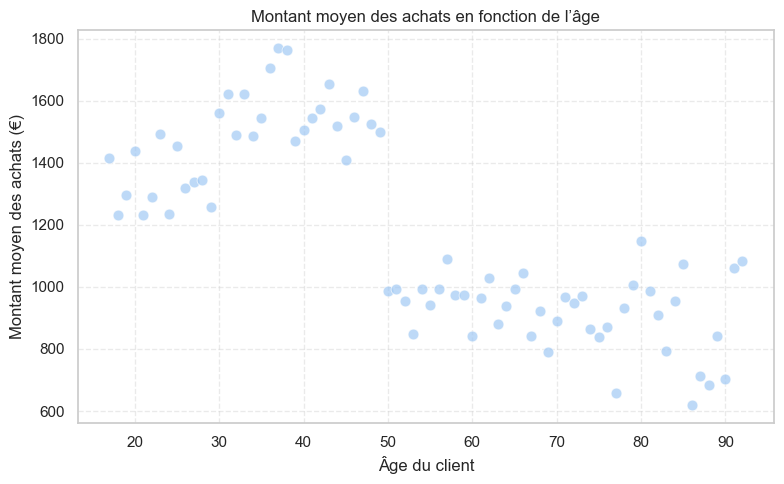

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agréger : montant total moyen par âge
df_agg_age = df_ca_clients.groupby("age")["CA_total"].mean().reset_index()

# Nuage de points allégé (âge vs CA moyen)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_agg_age, x="age", y="CA_total", alpha=0.7, s=60)
plt.title("Montant moyen des achats en fonction de l’âge")
plt.xlabel("Âge du client")
plt.ylabel("Montant moyen des achats (€)")
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 📊 Visualisation : Nuage de points

Le graphique ci-dessous représente la **relation entre l’âge des clients** et le **montant total de leurs achats en ligne**.

#### 🧠 Observations :

- La répartition est **dense chez les jeunes clients** (18 à 40 ans) avec un **niveau d’achat élevé** et relativement homogène.
- À partir de 60 ans, on observe une **baisse nette du montant total dépensé** : moins de points et des montants plus faibles.
- La relation n’est **pas strictement linéaire** : on perçoit plutôt une **tendance décroissante globale** avec l’âge.
- Quelques **outliers** (gros acheteurs) sont présents dans toutes les tranches d’âge, mais plus concentrés chez les jeunes.

Cette visualisation suggère une possible **corrélation négative entre l’âge et le montant total dépensé**, que nous allons vérifier à l’aide d’un test statistique.

In [117]:
from scipy.stats import shapiro

# Test de normalité sur l’âge
stat_age, p_age = shapiro(df_ca_clients['age'].sample(5000, random_state=1))  # Échantillonner pour éviter warning
# Test de normalité sur le montant total
stat_ca, p_ca = shapiro(df_ca_clients['CA_total'].sample(5000, random_state=1))

print(f"📊 Shapiro-Wilk – Âge : p-value = {p_age:.4f} {'(normale)' if p_age > 0.05 else '❌ pas normale'}")
print(f"📊 Shapiro-Wilk – CA total : p-value = {p_ca:.4f} {'(normale)' if p_ca > 0.05 else '❌ pas normale'}")

📊 Shapiro-Wilk – Âge : p-value = 0.0000 ❌ pas normale
📊 Shapiro-Wilk – CA total : p-value = 0.0000 ❌ pas normale


In [118]:
from scipy.stats import spearmanr

# Corrélation Spearman : âge ↔ montant total des achats
spearman_corr, spearman_p = spearmanr(df_ca_clients['age'], df_ca_clients['CA_total'])

print(f"📈 Coefficient de Spearman : {spearman_corr:.2f}")
print(f"🎯 p-value : {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ Conclusion : corrélation monotone significative entre l’âge et le montant total dépensé.")
else:
    print("❌ Conclusion : pas de corrélation monotone significative.")

📈 Coefficient de Spearman : -0.18
🎯 p-value : 0.0000
✅ Conclusion : corrélation monotone significative entre l’âge et le montant total dépensé.


### ✅ Interprétation des résultats

Le test de Spearman montre une **corrélation négative faible mais significative** entre l’âge et le montant total dépensé :

- Le **coefficient -0.18** indique qu’en moyenne, **les clients plus jeunes ont tendance à dépenser davantage** que les plus âgés.
- La **p-value < 0.05** confirme que cette relation n’est pas due au hasard.

Cela confirme ce que l’on observait déjà visuellement dans le nuage de points, avec une **concentration d’acheteurs actifs dans les tranches d’âge 20–40 ans**, et une tendance à la baisse du montant total chez les plus de 60 ans.

Ce résultat peut orienter des décisions marketing ciblées en fonction de l’âge des clients.

## <a name="section_3_4"></a>📊 Relation entre l’âge et la fréquence d’achat

Dans cette section, nous cherchons à déterminer si l’**âge d’un client** influence la **fréquence de ses achats** en ligne.

Nous comparons ici deux variables :
- `age` : variable quantitative continue
- `nb_achats` : fréquence d’achat, mesurée par le **nombre de transactions enregistrées** pour chaque client

Nous allons :
1. Créer un jeu de données client (âge + nombre d’achats)
2. Visualiser la relation avec un nuage de points
3. Tester la normalité des deux variables
4. Appliquer le test de corrélation adapté (Pearson ou Spearman)

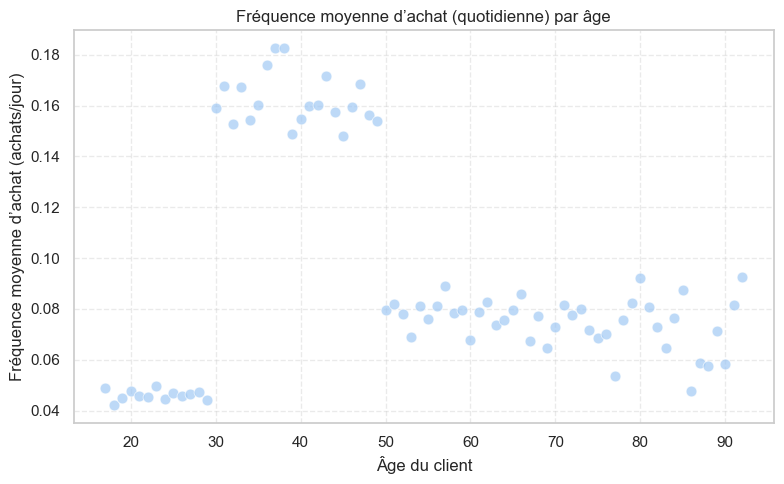

In [121]:
# 1. Période totale de l'échantillon
date_min = df_sans_b2b["date"].min()
date_max = df_sans_b2b["date"].max()
nb_jours = (date_max - date_min).days

# 2. Calcul de la fréquence d’achat réelle par client
df_freq_clients = (
    df_sans_b2b
    .groupby("client_id")
    .agg(age=("age", "first"), nb_achats=("session_id", "count"))
    .reset_index()
)

df_freq_clients["freq_achat"] = df_freq_clients["nb_achats"] / nb_jours  # achats par jour

# 3. Agrégation par âge
df_agg_freq = df_freq_clients.groupby("age")["freq_achat"].mean().reset_index()

# 4. Visualisation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_agg_freq, x="age", y="freq_achat", alpha=0.7, s=60)
plt.title("Fréquence moyenne d’achat (quotidienne) par âge")
plt.xlabel("Âge du client")
plt.ylabel("Fréquence moyenne d’achat (achats/jour)")
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

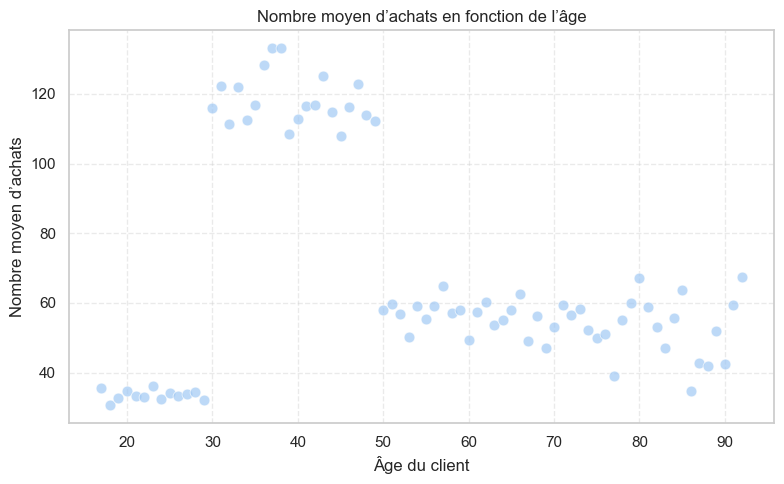

In [122]:
# Agréger : nombre moyen d’achats par âge
df_agg_freq = df_freq_clients.groupby("age")["nb_achats"].mean().reset_index()

# Nuage de points
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_agg_freq, x="age", y="nb_achats", alpha=0.7, s=60)
plt.title("Nombre moyen d’achats en fonction de l’âge")
plt.xlabel("Âge du client")
plt.ylabel("Nombre moyen d’achats")
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 📊 Visualisation : Nuage de points

Le graphique ci-dessous représente la **relation entre l’âge des clients** et leur **fréquence d’achat**, mesurée par le nombre total de transactions enregistrées.

#### 🧠 Observations :

- Une **forte concentration d’acheteurs actifs** apparaît entre **25 et 45 ans**, avec un nombre élevé de transactions (parfois plus de 400).
- À partir de 60 ans, on observe une **baisse progressive de la fréquence d’achat**.
- Les clients les plus jeunes (moins de 25 ans) semblent également **moins réguliers** dans leurs achats.
- La relation semble **non linéaire** et relativement **dispersée**, ce qui suggère qu’un test de corrélation non paramétrique sera plus adapté.

Nous allons maintenant tester la normalité de ces deux variables pour choisir le test statistique approprié.

In [124]:
from scipy.stats import shapiro

# Shapiro sur un échantillon de 5000 (sécurité contre les warnings)
shapiro_age = shapiro(df_freq_clients['age'].sample(5000, random_state=1))
shapiro_freq = shapiro(df_freq_clients['nb_achats'].sample(5000, random_state=1))

print(f"📊 Shapiro-Wilk – Âge : p-value = {shapiro_age.pvalue:.4f} {'(normale)' if shapiro_age.pvalue > 0.05 else '❌ pas normale'}")
print(f"📊 Shapiro-Wilk – Fréquence d’achat : p-value = {shapiro_freq.pvalue:.4f} {'(normale)' if shapiro_freq.pvalue > 0.05 else '❌ pas normale'}")


📊 Shapiro-Wilk – Âge : p-value = 0.0000 ❌ pas normale
📊 Shapiro-Wilk – Fréquence d’achat : p-value = 0.0000 ❌ pas normale


In [125]:
from scipy.stats import spearmanr

# Corrélation âge ↔ nb d'achats
spearman_corr, spearman_p = spearmanr(df_freq_clients['age'], df_freq_clients['nb_achats'])

print(f"📈 Coefficient de Spearman : {spearman_corr:.2f}")
print(f"🎯 p-value : {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ Conclusion : corrélation monotone significative entre l’âge et la fréquence d’achat.")
else:
    print("❌ Conclusion : pas de corrélation monotone significative.")

📈 Coefficient de Spearman : 0.13
🎯 p-value : 0.0000
✅ Conclusion : corrélation monotone significative entre l’âge et la fréquence d’achat.


### ✅ Interprétation des résultats

Le test de Spearman révèle une **corrélation monotone significative** entre l’âge et la fréquence d’achat :

- Le **coefficient ρ = 0.13** indique une **corrélation positive faible** : les clients plus âgés ont, en moyenne, une **légère tendance à effectuer plus d’achats** que les plus jeunes.
- Bien que la corrélation soit **statistiquement significative** (p-value < 0.05), elle reste **faible** sur le plan de l’intensité.
- Cela peut s’expliquer par des comportements plus réguliers ou fidélisés chez certains clients plus âgés, malgré un volume total d’achat parfois inférieur.

Ce résultat nuance les idées reçues : si les jeunes dépensent souvent plus par achat, les plus âgés peuvent être plus réguliers dans leurs achats.

## <a name="section_3_5"></a>📊 Relation entre l’âge et le panier moyen

Dans cette dernière analyse, nous cherchons à savoir si l’**âge d’un client** influence la **taille moyenne de son panier**, c’est-à-dire le **montant moyen qu’il dépense à chaque achat**.

Nous comparons ici deux variables quantitatives :
- `age` : âge du client
- `panier_moyen` : montant moyen dépensé par transaction

Comme dans les précédentes corrélations, nous allons :
1. Préparer les données (âge, total des achats, nombre d’achats, panier moyen)
2. Visualiser la relation à l’aide d’un nuage de points
3. Tester la normalité des deux variables
4. Appliquer un test de corrélation (Pearson ou Spearman)

In [128]:
# Regrouper les données clients
df_panier_clients = (
    df_sans_b2b
    .groupby("client_id")
    .agg(
        age=("age", "first"),
        total_achats=("price", "sum"),
        nb_achats=("session_id", "count")
    )
    .assign(panier_moyen=lambda x: x["total_achats"] / x["nb_achats"])
    .reset_index()
)

df_panier_clients.head()

## voir pour regroupement par âge

,client_id,age,total_achats,nb_achats,panier_moyen
0,c_1,66,629.02,43,14.628372
1,c_10,65,1353.60,58,23.337931
2,c_100,29,254.85,8,31.856250
3,c_1000,55,2291.88,126,18.189524
4,c_1001,39,1823.85,103,17.707282


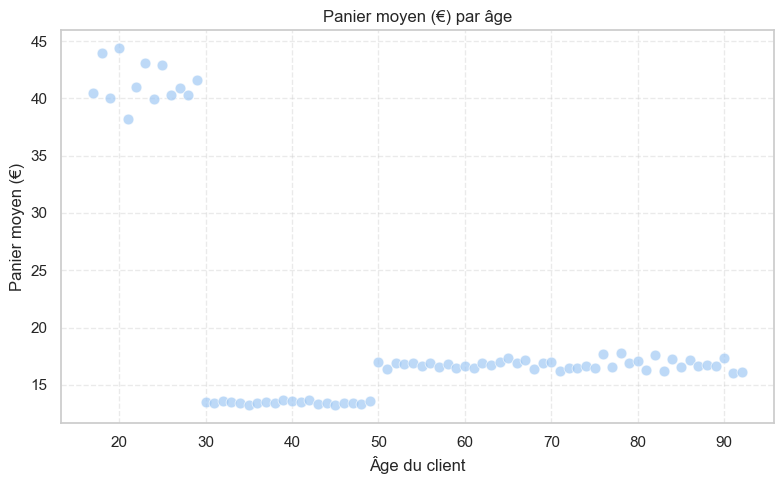

In [129]:
# Panier moyen par client
df_panier_clients = (
    df_sans_b2b
    .groupby("client_id")
    .agg(age=("age", "first"), panier_moyen=("price", "mean"))
    .reset_index()
)

# Agrégation par âge
df_agg_panier = df_panier_clients.groupby("age")["panier_moyen"].mean().reset_index()

# Visualisation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_agg_panier, x="age", y="panier_moyen", alpha=0.7, s=60)
plt.title("Panier moyen (€) par âge")
plt.xlabel("Âge du client")
plt.ylabel("Panier moyen (€)")
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 📊 Visualisation : Nuage de points

Ce graphique présente la relation entre l’**âge des clients** et la **taille moyenne de leur panier**.

#### 🧠 Observations :

- On observe une **forte concentration de paniers moyens élevés** chez les **plus jeunes clients** (notamment les moins de 30 ans).
- À partir de 35 ans, la **taille du panier moyen tend à baisser** et se stabilise autour de 15–25 €, avec peu de points extrêmes.
- La relation semble être **non linéaire** et fortement influencée par une **minorité de jeunes clients à très haut panier moyen**, ce qui suggère des **outliers**.
- Globalement, on observe une **tendance décroissante** du panier moyen avec l’âge.

Nous allons vérifier cette intuition par un test statistique de corrélation.

In [131]:
from scipy.stats import shapiro

# Échantillonnage à 5000 observations pour éviter les warnings
shapiro_age = shapiro(df_panier_clients['age'].sample(5000, random_state=1))
shapiro_panier = shapiro(df_panier_clients['panier_moyen'].sample(5000, random_state=1))

print(f"📊 Shapiro-Wilk – Âge : p-value = {shapiro_age.pvalue:.4f} {'(normale)' if shapiro_age.pvalue > 0.05 else '❌ pas normale'}")
print(f"📊 Shapiro-Wilk – Panier moyen : p-value = {shapiro_panier.pvalue:.4f} {'(normale)' if shapiro_panier.pvalue > 0.05 else '❌ pas normale'}")

📊 Shapiro-Wilk – Âge : p-value = 0.0000 ❌ pas normale
📊 Shapiro-Wilk – Panier moyen : p-value = 0.0000 ❌ pas normale


In [132]:
from scipy.stats import spearmanr

# Corrélation Spearman : âge ↔ panier moyen
spearman_corr, spearman_p = spearmanr(df_panier_clients['age'], df_panier_clients['panier_moyen'])

print(f"📈 Coefficient de Spearman : {spearman_corr:.2f}")
print(f"🎯 p-value : {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ Conclusion : corrélation monotone significative entre l’âge et le panier moyen.")
else:
    print("❌ Conclusion : pas de corrélation monotone significative.")

📈 Coefficient de Spearman : -0.33
🎯 p-value : 0.0000
✅ Conclusion : corrélation monotone significative entre l’âge et le panier moyen.


### ✅ Interprétation des résultats

Le test de Spearman révèle une **corrélation négative modérée** entre l’âge et le panier moyen :

- Le **coefficient ρ = -0.33** indique que plus l’âge augmente, plus le **montant moyen dépensé par achat diminue**.
- La **p-value < 0.05** confirme que cette relation est **statistiquement significative**.
- Cette tendance avait déjà été repérée visuellement sur le nuage de points.

👉 On peut donc conclure que les **clients les plus jeunes** ont tendance à faire des achats plus chers à chaque transaction, tandis que les clients plus âgés effectuent des achats plus fréquents mais à **valeur unitaire plus faible**.

Ces résultats sont précieux pour orienter des décisions de segmentation, de ciblage ou de personnalisation des offres marketing selon l’âge.

## 🧾 Synthèse – Analyse des comportements des clients

Cette section visait à mieux comprendre les comportements d’achat en ligne selon des caractéristiques clients telles que le **genre** et l’**âge**.  
Voici un résumé des corrélations explorées :

---

### 3.1 🎯 Genre ↔ Catégorie de livres
- ✅ Test du Khi² d’indépendance significatif (p < 0.05)
- 👉 Les femmes sont surreprésentées dans certaines catégories (notamment la catégorie 1)
- 📊 Heatmap des contributions montre l’origine de cette dépendance

---

### 3.2 🎯 Âge ↔ Catégorie de livres
- ❌ Normalité rejetée → test de Kruskal-Wallis
- ✅ Différences significatives d’âge selon les catégories (p < 0.05)
- 🔁 Corrélation Spearman significative
- 👉 Les plus jeunes achètent majoritairement dans certaines catégories (ex. cat. 2)

---

### 3.3 🎯 Âge ↔ Montant total des achats
- ❌ Normalité rejetée → test de Spearman
- ✅ Corrélation significative et **faiblement négative** (ρ = -0.18)
- 👉 Les clients plus jeunes tendent à dépenser davantage globalement

---

### 3.4 🎯 Âge ↔ Fréquence d’achat
- ✅ Corrélation de Spearman **positive mais faible** (ρ = 0.13)
- 👉 Les clients un peu plus âgés semblent acheter **plus fréquemment**

---

### 3.5 🎯 Âge ↔ Panier moyen
- ✅ Corrélation de Spearman **modérément négative** (ρ = -0.33)
- 👉 Les jeunes ont un panier moyen plus élevé ; les clients plus âgés achètent plus petit mais plus souvent

---

### ✅ Conclusion générale

> Le facteur **âge** influence de manière significative plusieurs aspects du comportement d’achat :
> - **Type de produits achetés**
> - **Fréquence d’achat**
> - **Montant moyen et total dépensé**

Ces résultats offrent des pistes claires pour :
- Affiner la **segmentation client**
- Adapter les **stratégies marketing**
- Mieux cibler certaines tranches d’âge avec des offres personnalisées